<a href="https://colab.research.google.com/github/asadali18/Generating-Fashion-Designs/blob/master/fashion_mnist_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/127.5-1

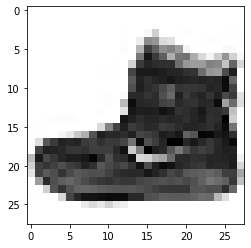

In [16]:
plt.imshow(x_train[0], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [19]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 1024)             

In [20]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.814246, acc.: 42.19%] [G loss: 0.797241]


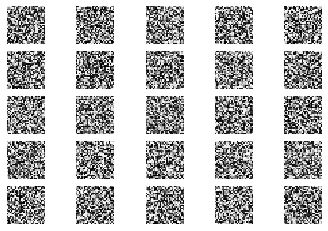

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.374838, acc.: 90.62%] [G loss: 0.821265]
2 [D loss: 0.322498, acc.: 85.94%] [G loss: 0.955366]
3 [D loss: 0.300853, acc.: 90.62%] [G loss: 1.004150]
4 [D loss: 0.247036, acc.: 96.88%] [G loss: 1.212464]
5 [D loss: 0.196915, acc.: 98.44%] [G loss: 1.288739]
6 [D loss: 0.228498, acc.: 96.88%] [G loss: 1.406063]
7 [D loss: 0.154591, acc.: 100.00%] [G loss: 1.576980]
8 [D loss: 0.167084, acc.: 100.00%] [G loss: 1.586094]
9 [D loss: 0.121424, acc.: 100.00%] [G loss: 1.660047]
10 [D loss: 0.138170, acc.: 98.44%] [G loss: 1.835665]
11 [D loss: 0.122413, acc.: 98.44%] [G loss: 1.859785]
12 [D loss: 0.104452, acc.: 98.44%] [G loss: 1.796216]
13 [D loss: 0.105574, acc.: 100.00%] [G loss: 1.946982]
14 [D loss: 0.089306, acc.: 100.00%] [G loss: 2.070883]
15 [D loss: 0.084290, acc.: 100.00%] [G loss: 2.228929]
16 [D loss: 0.087845, acc.: 100.00%] [G loss: 2.300274]
17 [D loss: 0.067500, acc.: 100.00%] [G loss: 2.317096]
18 [D loss: 0.076763, acc.: 100.00%] [G loss: 2.427747]
19 [D loss

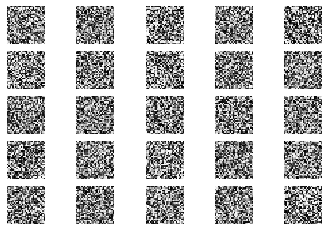

51 [D loss: 0.021022, acc.: 100.00%] [G loss: 3.568667]
52 [D loss: 0.030119, acc.: 100.00%] [G loss: 3.617696]
53 [D loss: 0.027650, acc.: 100.00%] [G loss: 3.522169]
54 [D loss: 0.019106, acc.: 100.00%] [G loss: 3.695897]
55 [D loss: 0.023618, acc.: 100.00%] [G loss: 3.773294]
56 [D loss: 0.018912, acc.: 100.00%] [G loss: 3.717848]
57 [D loss: 0.022233, acc.: 100.00%] [G loss: 3.821481]
58 [D loss: 0.020781, acc.: 100.00%] [G loss: 3.790998]
59 [D loss: 0.016091, acc.: 100.00%] [G loss: 3.714043]
60 [D loss: 0.015929, acc.: 100.00%] [G loss: 3.880973]
61 [D loss: 0.017006, acc.: 100.00%] [G loss: 3.977595]
62 [D loss: 0.028094, acc.: 98.44%] [G loss: 3.876988]
63 [D loss: 0.021162, acc.: 100.00%] [G loss: 3.903574]
64 [D loss: 0.022924, acc.: 100.00%] [G loss: 4.025423]
65 [D loss: 0.041474, acc.: 98.44%] [G loss: 3.834277]
66 [D loss: 0.021349, acc.: 100.00%] [G loss: 3.873781]
67 [D loss: 0.018358, acc.: 100.00%] [G loss: 4.003315]
68 [D loss: 0.017722, acc.: 100.00%] [G loss: 4.06

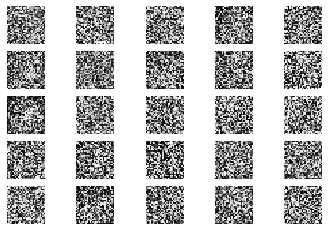

101 [D loss: 0.023932, acc.: 100.00%] [G loss: 4.496026]
102 [D loss: 0.016603, acc.: 100.00%] [G loss: 4.727153]
103 [D loss: 0.016097, acc.: 100.00%] [G loss: 4.619359]
104 [D loss: 0.012033, acc.: 100.00%] [G loss: 4.593847]
105 [D loss: 0.027273, acc.: 100.00%] [G loss: 4.655496]
106 [D loss: 0.010622, acc.: 100.00%] [G loss: 4.525867]
107 [D loss: 0.023070, acc.: 100.00%] [G loss: 4.376683]
108 [D loss: 0.019151, acc.: 100.00%] [G loss: 4.590368]
109 [D loss: 0.022424, acc.: 100.00%] [G loss: 4.640840]
110 [D loss: 0.017228, acc.: 100.00%] [G loss: 4.743482]
111 [D loss: 0.007855, acc.: 100.00%] [G loss: 4.634186]
112 [D loss: 0.022976, acc.: 100.00%] [G loss: 4.671811]
113 [D loss: 0.021388, acc.: 100.00%] [G loss: 4.661777]
114 [D loss: 0.031033, acc.: 100.00%] [G loss: 4.676141]
115 [D loss: 0.022684, acc.: 100.00%] [G loss: 4.811312]
116 [D loss: 0.013472, acc.: 100.00%] [G loss: 4.747049]
117 [D loss: 0.022870, acc.: 100.00%] [G loss: 4.804543]
118 [D loss: 0.030741, acc.: 10

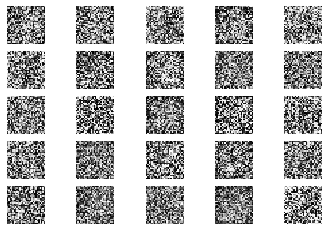

151 [D loss: 0.062148, acc.: 98.44%] [G loss: 4.623371]
152 [D loss: 0.067748, acc.: 98.44%] [G loss: 4.876044]
153 [D loss: 0.077024, acc.: 98.44%] [G loss: 4.770720]
154 [D loss: 0.040365, acc.: 100.00%] [G loss: 5.089067]
155 [D loss: 0.036502, acc.: 100.00%] [G loss: 5.189249]
156 [D loss: 0.025630, acc.: 100.00%] [G loss: 5.032846]
157 [D loss: 0.027868, acc.: 100.00%] [G loss: 4.936750]
158 [D loss: 0.028659, acc.: 100.00%] [G loss: 4.844967]
159 [D loss: 0.023176, acc.: 100.00%] [G loss: 4.811760]
160 [D loss: 0.015562, acc.: 100.00%] [G loss: 5.093920]
161 [D loss: 0.038917, acc.: 100.00%] [G loss: 4.882589]
162 [D loss: 0.018297, acc.: 100.00%] [G loss: 5.022111]
163 [D loss: 0.063097, acc.: 98.44%] [G loss: 4.703914]
164 [D loss: 0.181188, acc.: 90.62%] [G loss: 4.866122]
165 [D loss: 0.059495, acc.: 100.00%] [G loss: 4.614246]
166 [D loss: 0.082833, acc.: 98.44%] [G loss: 4.845746]
167 [D loss: 0.073646, acc.: 96.88%] [G loss: 4.902695]
168 [D loss: 0.055317, acc.: 98.44%] [

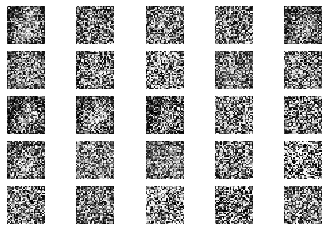

201 [D loss: 0.198127, acc.: 85.94%] [G loss: 4.269338]
202 [D loss: 0.077539, acc.: 96.88%] [G loss: 4.892279]
203 [D loss: 0.095152, acc.: 98.44%] [G loss: 4.698814]
204 [D loss: 0.066617, acc.: 100.00%] [G loss: 4.551542]
205 [D loss: 0.070303, acc.: 96.88%] [G loss: 5.118740]
206 [D loss: 0.122910, acc.: 95.31%] [G loss: 4.922931]
207 [D loss: 0.217031, acc.: 87.50%] [G loss: 3.776822]
208 [D loss: 0.151474, acc.: 90.62%] [G loss: 4.314656]
209 [D loss: 0.120502, acc.: 98.44%] [G loss: 4.806617]
210 [D loss: 0.102003, acc.: 98.44%] [G loss: 4.473589]
211 [D loss: 0.063183, acc.: 100.00%] [G loss: 4.663733]
212 [D loss: 0.142493, acc.: 96.88%] [G loss: 5.015069]
213 [D loss: 0.124593, acc.: 96.88%] [G loss: 4.177917]
214 [D loss: 0.083281, acc.: 95.31%] [G loss: 4.029698]
215 [D loss: 0.091730, acc.: 96.88%] [G loss: 4.405962]
216 [D loss: 0.136191, acc.: 95.31%] [G loss: 4.049523]
217 [D loss: 0.094867, acc.: 96.88%] [G loss: 4.632836]
218 [D loss: 0.286263, acc.: 85.94%] [G loss: 

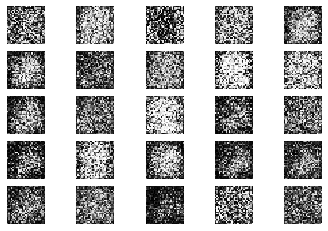

251 [D loss: 0.290776, acc.: 87.50%] [G loss: 4.421762]
252 [D loss: 0.149871, acc.: 95.31%] [G loss: 3.940958]
253 [D loss: 0.233780, acc.: 90.62%] [G loss: 3.695642]
254 [D loss: 0.150812, acc.: 93.75%] [G loss: 4.434249]
255 [D loss: 0.310115, acc.: 89.06%] [G loss: 3.677354]
256 [D loss: 0.243765, acc.: 90.62%] [G loss: 3.474155]
257 [D loss: 0.203064, acc.: 98.44%] [G loss: 3.751017]
258 [D loss: 0.197636, acc.: 93.75%] [G loss: 3.980557]
259 [D loss: 0.228086, acc.: 90.62%] [G loss: 4.401096]
260 [D loss: 0.129261, acc.: 95.31%] [G loss: 4.250281]
261 [D loss: 0.229524, acc.: 92.19%] [G loss: 3.326385]
262 [D loss: 0.105849, acc.: 96.88%] [G loss: 4.119935]
263 [D loss: 0.187514, acc.: 93.75%] [G loss: 4.475046]
264 [D loss: 0.334418, acc.: 84.38%] [G loss: 3.117991]
265 [D loss: 0.259138, acc.: 90.62%] [G loss: 3.223725]
266 [D loss: 0.159175, acc.: 93.75%] [G loss: 4.104830]
267 [D loss: 0.288432, acc.: 84.38%] [G loss: 3.989266]
268 [D loss: 0.103171, acc.: 98.44%] [G loss: 4.

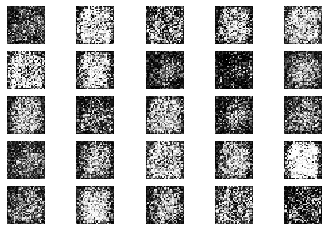

301 [D loss: 0.469810, acc.: 75.00%] [G loss: 3.650074]
302 [D loss: 0.410974, acc.: 89.06%] [G loss: 4.027916]
303 [D loss: 0.326845, acc.: 92.19%] [G loss: 3.670973]
304 [D loss: 0.270932, acc.: 89.06%] [G loss: 2.895184]
305 [D loss: 0.327965, acc.: 84.38%] [G loss: 3.391621]
306 [D loss: 0.795373, acc.: 68.75%] [G loss: 2.549893]
307 [D loss: 0.249355, acc.: 89.06%] [G loss: 3.401871]
308 [D loss: 0.333643, acc.: 82.81%] [G loss: 3.333614]
309 [D loss: 0.327334, acc.: 82.81%] [G loss: 3.210763]
310 [D loss: 0.304506, acc.: 85.94%] [G loss: 3.995908]
311 [D loss: 0.283549, acc.: 85.94%] [G loss: 3.466615]
312 [D loss: 0.299508, acc.: 90.62%] [G loss: 2.815757]
313 [D loss: 0.241297, acc.: 92.19%] [G loss: 3.680516]
314 [D loss: 0.913772, acc.: 62.50%] [G loss: 2.637496]
315 [D loss: 0.294850, acc.: 90.62%] [G loss: 3.026603]
316 [D loss: 0.378375, acc.: 87.50%] [G loss: 3.178674]
317 [D loss: 0.265321, acc.: 89.06%] [G loss: 3.239047]
318 [D loss: 0.363826, acc.: 85.94%] [G loss: 3.

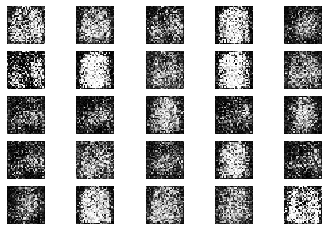

351 [D loss: 0.469088, acc.: 79.69%] [G loss: 2.685345]
352 [D loss: 0.624949, acc.: 82.81%] [G loss: 2.394667]
353 [D loss: 0.310544, acc.: 84.38%] [G loss: 3.505702]
354 [D loss: 0.515252, acc.: 81.25%] [G loss: 2.328300]
355 [D loss: 0.335032, acc.: 87.50%] [G loss: 2.245836]
356 [D loss: 0.419535, acc.: 76.56%] [G loss: 2.610660]
357 [D loss: 0.428211, acc.: 82.81%] [G loss: 2.679268]
358 [D loss: 0.515016, acc.: 75.00%] [G loss: 2.428317]
359 [D loss: 0.200277, acc.: 95.31%] [G loss: 3.187956]
360 [D loss: 0.523242, acc.: 73.44%] [G loss: 2.758874]
361 [D loss: 0.462913, acc.: 71.88%] [G loss: 3.066421]
362 [D loss: 0.438307, acc.: 78.12%] [G loss: 1.999820]
363 [D loss: 0.581701, acc.: 76.56%] [G loss: 2.251052]
364 [D loss: 0.549405, acc.: 81.25%] [G loss: 2.413703]
365 [D loss: 0.377286, acc.: 87.50%] [G loss: 2.577910]
366 [D loss: 0.531379, acc.: 70.31%] [G loss: 2.654417]
367 [D loss: 0.556753, acc.: 76.56%] [G loss: 2.167042]
368 [D loss: 0.371767, acc.: 82.81%] [G loss: 2.

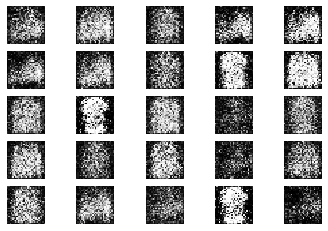

401 [D loss: 0.619022, acc.: 59.38%] [G loss: 1.886384]
402 [D loss: 0.715986, acc.: 65.62%] [G loss: 1.550999]
403 [D loss: 0.687590, acc.: 64.06%] [G loss: 1.645906]
404 [D loss: 0.447932, acc.: 85.94%] [G loss: 2.022999]
405 [D loss: 0.561817, acc.: 71.88%] [G loss: 1.760303]
406 [D loss: 0.576456, acc.: 64.06%] [G loss: 1.885636]
407 [D loss: 0.786670, acc.: 59.38%] [G loss: 1.817231]
408 [D loss: 0.726752, acc.: 64.06%] [G loss: 1.589209]
409 [D loss: 0.534962, acc.: 71.88%] [G loss: 1.733070]
410 [D loss: 0.508062, acc.: 75.00%] [G loss: 2.084623]
411 [D loss: 0.740588, acc.: 68.75%] [G loss: 1.389379]
412 [D loss: 0.563096, acc.: 67.19%] [G loss: 1.742335]
413 [D loss: 0.694922, acc.: 60.94%] [G loss: 1.512414]
414 [D loss: 0.639646, acc.: 62.50%] [G loss: 1.633634]
415 [D loss: 0.589907, acc.: 73.44%] [G loss: 1.604197]
416 [D loss: 0.535021, acc.: 73.44%] [G loss: 1.807034]
417 [D loss: 0.626198, acc.: 62.50%] [G loss: 1.567356]
418 [D loss: 0.699113, acc.: 71.88%] [G loss: 1.

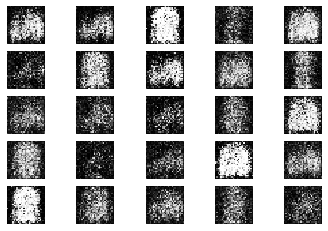

451 [D loss: 0.598567, acc.: 73.44%] [G loss: 1.222998]
452 [D loss: 0.617460, acc.: 76.56%] [G loss: 1.173858]
453 [D loss: 0.756289, acc.: 51.56%] [G loss: 1.229007]
454 [D loss: 0.613546, acc.: 67.19%] [G loss: 1.344349]
455 [D loss: 0.702734, acc.: 75.00%] [G loss: 1.309723]
456 [D loss: 0.621202, acc.: 75.00%] [G loss: 1.404345]
457 [D loss: 0.554106, acc.: 79.69%] [G loss: 1.362087]
458 [D loss: 0.597369, acc.: 67.19%] [G loss: 1.371067]
459 [D loss: 0.590390, acc.: 68.75%] [G loss: 1.299899]
460 [D loss: 0.717765, acc.: 60.94%] [G loss: 1.167364]
461 [D loss: 0.623583, acc.: 60.94%] [G loss: 1.405447]
462 [D loss: 0.493208, acc.: 79.69%] [G loss: 1.437321]
463 [D loss: 0.760156, acc.: 62.50%] [G loss: 1.144543]
464 [D loss: 0.594575, acc.: 60.94%] [G loss: 1.196921]
465 [D loss: 0.586070, acc.: 62.50%] [G loss: 1.287881]
466 [D loss: 0.618151, acc.: 70.31%] [G loss: 1.219661]
467 [D loss: 0.697915, acc.: 59.38%] [G loss: 1.091321]
468 [D loss: 0.678734, acc.: 62.50%] [G loss: 1.

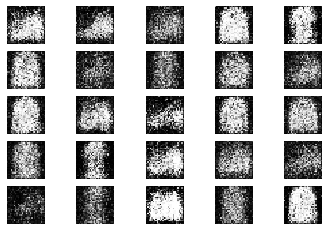

501 [D loss: 0.698186, acc.: 56.25%] [G loss: 1.101389]
502 [D loss: 0.620306, acc.: 67.19%] [G loss: 1.197228]
503 [D loss: 0.576781, acc.: 68.75%] [G loss: 1.092930]
504 [D loss: 0.697775, acc.: 57.81%] [G loss: 1.027112]
505 [D loss: 0.524417, acc.: 73.44%] [G loss: 1.061069]
506 [D loss: 0.744216, acc.: 57.81%] [G loss: 0.976496]
507 [D loss: 0.669241, acc.: 54.69%] [G loss: 1.018580]
508 [D loss: 0.637632, acc.: 75.00%] [G loss: 1.095293]
509 [D loss: 0.560893, acc.: 73.44%] [G loss: 1.095357]
510 [D loss: 0.553200, acc.: 65.62%] [G loss: 1.184729]
511 [D loss: 0.645412, acc.: 65.62%] [G loss: 1.070585]
512 [D loss: 0.639347, acc.: 64.06%] [G loss: 1.129326]
513 [D loss: 0.557432, acc.: 71.88%] [G loss: 1.081215]
514 [D loss: 0.572207, acc.: 70.31%] [G loss: 1.149683]
515 [D loss: 0.570966, acc.: 71.88%] [G loss: 1.067047]
516 [D loss: 0.574030, acc.: 67.19%] [G loss: 1.147487]
517 [D loss: 0.601985, acc.: 71.88%] [G loss: 1.193955]
518 [D loss: 0.615210, acc.: 73.44%] [G loss: 1.

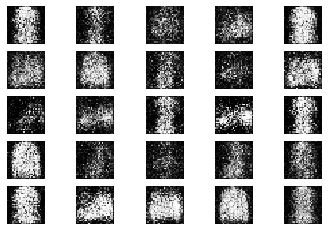

551 [D loss: 0.696406, acc.: 57.81%] [G loss: 1.000670]
552 [D loss: 0.597076, acc.: 62.50%] [G loss: 1.044475]
553 [D loss: 0.525883, acc.: 73.44%] [G loss: 1.182826]
554 [D loss: 0.690973, acc.: 57.81%] [G loss: 1.109231]
555 [D loss: 0.660602, acc.: 68.75%] [G loss: 0.990567]
556 [D loss: 0.677316, acc.: 59.38%] [G loss: 0.956626]
557 [D loss: 0.668979, acc.: 65.62%] [G loss: 1.136570]
558 [D loss: 0.582163, acc.: 67.19%] [G loss: 1.057513]
559 [D loss: 0.637812, acc.: 67.19%] [G loss: 1.115502]
560 [D loss: 0.682071, acc.: 60.94%] [G loss: 1.058593]
561 [D loss: 0.573155, acc.: 76.56%] [G loss: 1.079739]
562 [D loss: 0.612494, acc.: 62.50%] [G loss: 1.056649]
563 [D loss: 0.650944, acc.: 67.19%] [G loss: 1.099387]
564 [D loss: 0.639267, acc.: 67.19%] [G loss: 1.077872]
565 [D loss: 0.712590, acc.: 65.62%] [G loss: 1.079016]
566 [D loss: 0.608208, acc.: 75.00%] [G loss: 1.027083]
567 [D loss: 0.600462, acc.: 70.31%] [G loss: 1.091976]
568 [D loss: 0.521382, acc.: 70.31%] [G loss: 1.

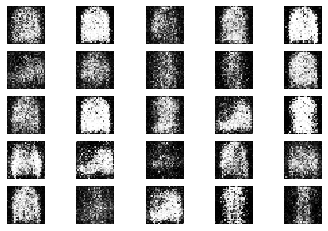

601 [D loss: 0.701690, acc.: 59.38%] [G loss: 1.034907]
602 [D loss: 0.664038, acc.: 57.81%] [G loss: 1.153891]
603 [D loss: 0.668220, acc.: 67.19%] [G loss: 1.124871]
604 [D loss: 0.688737, acc.: 64.06%] [G loss: 0.859555]
605 [D loss: 0.683599, acc.: 54.69%] [G loss: 0.901711]
606 [D loss: 0.617224, acc.: 67.19%] [G loss: 1.014842]
607 [D loss: 0.586965, acc.: 68.75%] [G loss: 1.150232]
608 [D loss: 0.532251, acc.: 73.44%] [G loss: 1.181257]
609 [D loss: 0.618012, acc.: 65.62%] [G loss: 1.101318]
610 [D loss: 0.592434, acc.: 71.88%] [G loss: 1.151456]
611 [D loss: 0.650680, acc.: 62.50%] [G loss: 0.956192]
612 [D loss: 0.564047, acc.: 71.88%] [G loss: 0.983151]
613 [D loss: 0.622142, acc.: 73.44%] [G loss: 1.071354]
614 [D loss: 0.710665, acc.: 53.12%] [G loss: 1.032124]
615 [D loss: 0.577432, acc.: 68.75%] [G loss: 1.121935]
616 [D loss: 0.587056, acc.: 71.88%] [G loss: 1.057598]
617 [D loss: 0.634174, acc.: 68.75%] [G loss: 1.050219]
618 [D loss: 0.615366, acc.: 68.75%] [G loss: 1.

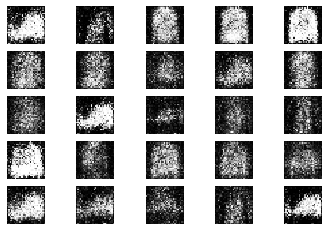

651 [D loss: 0.644728, acc.: 68.75%] [G loss: 1.031562]
652 [D loss: 0.611942, acc.: 67.19%] [G loss: 1.027246]
653 [D loss: 0.596676, acc.: 68.75%] [G loss: 1.128176]
654 [D loss: 0.645643, acc.: 70.31%] [G loss: 1.077088]
655 [D loss: 0.562202, acc.: 70.31%] [G loss: 1.040222]
656 [D loss: 0.671708, acc.: 64.06%] [G loss: 1.026002]
657 [D loss: 0.601665, acc.: 65.62%] [G loss: 0.950422]
658 [D loss: 0.589792, acc.: 71.88%] [G loss: 1.000882]
659 [D loss: 0.517277, acc.: 79.69%] [G loss: 0.890072]
660 [D loss: 0.531302, acc.: 73.44%] [G loss: 1.056051]
661 [D loss: 0.620388, acc.: 68.75%] [G loss: 0.993140]
662 [D loss: 0.570593, acc.: 73.44%] [G loss: 0.972944]
663 [D loss: 0.675259, acc.: 59.38%] [G loss: 1.022447]
664 [D loss: 0.642532, acc.: 67.19%] [G loss: 1.005774]
665 [D loss: 0.641290, acc.: 62.50%] [G loss: 1.023368]
666 [D loss: 0.628649, acc.: 67.19%] [G loss: 0.920429]
667 [D loss: 0.582150, acc.: 70.31%] [G loss: 0.896060]
668 [D loss: 0.549959, acc.: 73.44%] [G loss: 0.

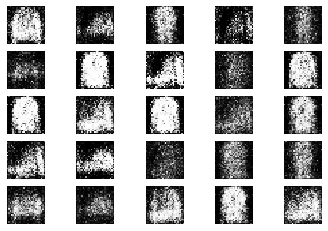

701 [D loss: 0.544664, acc.: 79.69%] [G loss: 1.080318]
702 [D loss: 0.629168, acc.: 65.62%] [G loss: 0.938330]
703 [D loss: 0.597999, acc.: 65.62%] [G loss: 1.083875]
704 [D loss: 0.602708, acc.: 67.19%] [G loss: 0.971112]
705 [D loss: 0.639330, acc.: 60.94%] [G loss: 1.057245]
706 [D loss: 0.531317, acc.: 76.56%] [G loss: 1.041779]
707 [D loss: 0.616741, acc.: 75.00%] [G loss: 0.990917]
708 [D loss: 0.529001, acc.: 71.88%] [G loss: 0.963815]
709 [D loss: 0.606442, acc.: 67.19%] [G loss: 0.960684]
710 [D loss: 0.582064, acc.: 71.88%] [G loss: 1.066499]
711 [D loss: 0.621304, acc.: 68.75%] [G loss: 1.139581]
712 [D loss: 0.528932, acc.: 75.00%] [G loss: 1.130044]
713 [D loss: 0.666345, acc.: 60.94%] [G loss: 0.970429]
714 [D loss: 0.560601, acc.: 76.56%] [G loss: 1.039317]
715 [D loss: 0.535825, acc.: 75.00%] [G loss: 1.048168]
716 [D loss: 0.645927, acc.: 60.94%] [G loss: 1.107661]
717 [D loss: 0.581545, acc.: 75.00%] [G loss: 1.008776]
718 [D loss: 0.596237, acc.: 60.94%] [G loss: 1.

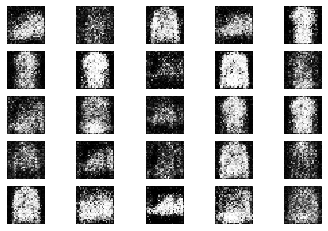

751 [D loss: 0.591130, acc.: 67.19%] [G loss: 0.976095]
752 [D loss: 0.640336, acc.: 56.25%] [G loss: 0.990777]
753 [D loss: 0.605484, acc.: 64.06%] [G loss: 0.992368]
754 [D loss: 0.600590, acc.: 64.06%] [G loss: 0.990870]
755 [D loss: 0.607852, acc.: 68.75%] [G loss: 0.988191]
756 [D loss: 0.579565, acc.: 71.88%] [G loss: 1.152959]
757 [D loss: 0.517222, acc.: 67.19%] [G loss: 1.015113]
758 [D loss: 0.576241, acc.: 68.75%] [G loss: 1.067734]
759 [D loss: 0.649844, acc.: 57.81%] [G loss: 1.110026]
760 [D loss: 0.668026, acc.: 64.06%] [G loss: 0.974842]
761 [D loss: 0.535018, acc.: 78.12%] [G loss: 0.905386]
762 [D loss: 0.598864, acc.: 71.88%] [G loss: 1.020972]
763 [D loss: 0.580476, acc.: 68.75%] [G loss: 1.117584]
764 [D loss: 0.634551, acc.: 65.62%] [G loss: 1.062495]
765 [D loss: 0.561552, acc.: 70.31%] [G loss: 0.976137]
766 [D loss: 0.604896, acc.: 65.62%] [G loss: 1.005807]
767 [D loss: 0.592718, acc.: 64.06%] [G loss: 1.086123]
768 [D loss: 0.677562, acc.: 60.94%] [G loss: 0.

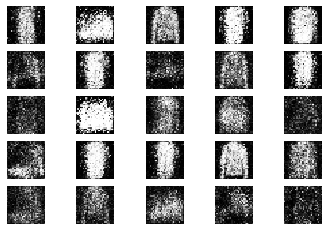

801 [D loss: 0.531380, acc.: 70.31%] [G loss: 1.015492]
802 [D loss: 0.609962, acc.: 68.75%] [G loss: 1.068040]
803 [D loss: 0.649903, acc.: 56.25%] [G loss: 0.996429]
804 [D loss: 0.653082, acc.: 59.38%] [G loss: 1.076593]
805 [D loss: 0.627324, acc.: 60.94%] [G loss: 1.064103]
806 [D loss: 0.614305, acc.: 62.50%] [G loss: 0.995922]
807 [D loss: 0.584823, acc.: 73.44%] [G loss: 0.975712]
808 [D loss: 0.563999, acc.: 71.88%] [G loss: 0.903262]
809 [D loss: 0.558817, acc.: 78.12%] [G loss: 0.979137]
810 [D loss: 0.556837, acc.: 71.88%] [G loss: 1.098651]
811 [D loss: 0.599614, acc.: 60.94%] [G loss: 1.091600]
812 [D loss: 0.554390, acc.: 70.31%] [G loss: 1.215446]
813 [D loss: 0.574990, acc.: 70.31%] [G loss: 1.000511]
814 [D loss: 0.650463, acc.: 59.38%] [G loss: 1.009338]
815 [D loss: 0.566588, acc.: 73.44%] [G loss: 1.048895]
816 [D loss: 0.547276, acc.: 75.00%] [G loss: 1.024185]
817 [D loss: 0.653191, acc.: 64.06%] [G loss: 0.958222]
818 [D loss: 0.652645, acc.: 64.06%] [G loss: 0.

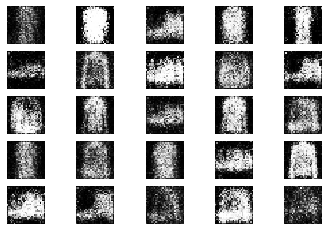

851 [D loss: 0.550838, acc.: 79.69%] [G loss: 0.976187]
852 [D loss: 0.540046, acc.: 76.56%] [G loss: 1.006759]
853 [D loss: 0.604609, acc.: 64.06%] [G loss: 0.953052]
854 [D loss: 0.631281, acc.: 67.19%] [G loss: 0.943691]
855 [D loss: 0.550490, acc.: 75.00%] [G loss: 0.970552]
856 [D loss: 0.608484, acc.: 60.94%] [G loss: 0.978516]
857 [D loss: 0.604295, acc.: 70.31%] [G loss: 0.992008]
858 [D loss: 0.598427, acc.: 62.50%] [G loss: 0.971896]
859 [D loss: 0.663265, acc.: 56.25%] [G loss: 0.885300]
860 [D loss: 0.579330, acc.: 70.31%] [G loss: 1.018306]
861 [D loss: 0.607192, acc.: 67.19%] [G loss: 1.009147]
862 [D loss: 0.622328, acc.: 57.81%] [G loss: 1.023672]
863 [D loss: 0.619429, acc.: 57.81%] [G loss: 1.000608]
864 [D loss: 0.538147, acc.: 76.56%] [G loss: 1.045431]
865 [D loss: 0.692686, acc.: 59.38%] [G loss: 1.038037]
866 [D loss: 0.594064, acc.: 67.19%] [G loss: 0.997412]
867 [D loss: 0.581502, acc.: 71.88%] [G loss: 0.987062]
868 [D loss: 0.650124, acc.: 62.50%] [G loss: 0.

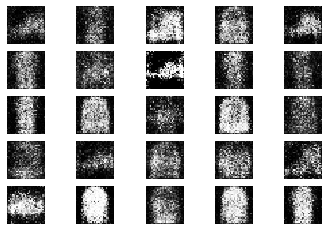

901 [D loss: 0.610706, acc.: 62.50%] [G loss: 0.899228]
902 [D loss: 0.570388, acc.: 68.75%] [G loss: 0.996698]
903 [D loss: 0.674124, acc.: 59.38%] [G loss: 1.020641]
904 [D loss: 0.546843, acc.: 79.69%] [G loss: 0.970266]
905 [D loss: 0.620687, acc.: 60.94%] [G loss: 0.836885]
906 [D loss: 0.648201, acc.: 65.62%] [G loss: 0.852861]
907 [D loss: 0.583506, acc.: 67.19%] [G loss: 0.921896]
908 [D loss: 0.665623, acc.: 56.25%] [G loss: 0.882546]
909 [D loss: 0.666001, acc.: 57.81%] [G loss: 0.902965]
910 [D loss: 0.639869, acc.: 57.81%] [G loss: 0.902782]
911 [D loss: 0.642997, acc.: 64.06%] [G loss: 0.977641]
912 [D loss: 0.576226, acc.: 68.75%] [G loss: 0.987759]
913 [D loss: 0.599385, acc.: 73.44%] [G loss: 0.901205]
914 [D loss: 0.642867, acc.: 65.62%] [G loss: 1.057511]
915 [D loss: 0.553281, acc.: 73.44%] [G loss: 1.032509]
916 [D loss: 0.560554, acc.: 75.00%] [G loss: 0.923363]
917 [D loss: 0.698863, acc.: 59.38%] [G loss: 0.922031]
918 [D loss: 0.750053, acc.: 51.56%] [G loss: 0.

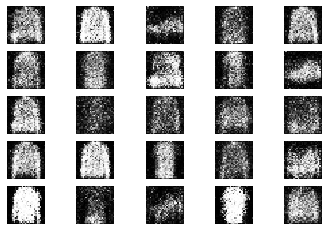

951 [D loss: 0.560532, acc.: 73.44%] [G loss: 1.028700]
952 [D loss: 0.568154, acc.: 75.00%] [G loss: 0.942378]
953 [D loss: 0.537911, acc.: 70.31%] [G loss: 0.962275]
954 [D loss: 0.598753, acc.: 62.50%] [G loss: 0.980737]
955 [D loss: 0.554677, acc.: 73.44%] [G loss: 0.954844]
956 [D loss: 0.603672, acc.: 71.88%] [G loss: 1.072052]
957 [D loss: 0.589435, acc.: 70.31%] [G loss: 0.983950]
958 [D loss: 0.535691, acc.: 78.12%] [G loss: 1.113871]
959 [D loss: 0.526317, acc.: 73.44%] [G loss: 1.067546]
960 [D loss: 0.649035, acc.: 59.38%] [G loss: 0.940586]
961 [D loss: 0.649129, acc.: 59.38%] [G loss: 0.986791]
962 [D loss: 0.653977, acc.: 67.19%] [G loss: 0.870487]
963 [D loss: 0.558028, acc.: 75.00%] [G loss: 0.790203]
964 [D loss: 0.625038, acc.: 68.75%] [G loss: 0.928970]
965 [D loss: 0.618553, acc.: 70.31%] [G loss: 0.896652]
966 [D loss: 0.582626, acc.: 71.88%] [G loss: 0.932625]
967 [D loss: 0.556070, acc.: 67.19%] [G loss: 0.932330]
968 [D loss: 0.627492, acc.: 64.06%] [G loss: 0.

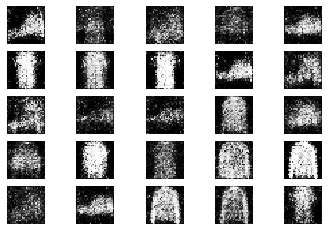

1001 [D loss: 0.598219, acc.: 67.19%] [G loss: 0.968814]
1002 [D loss: 0.602508, acc.: 68.75%] [G loss: 1.097923]
1003 [D loss: 0.565679, acc.: 79.69%] [G loss: 1.028893]
1004 [D loss: 0.619420, acc.: 68.75%] [G loss: 0.902081]
1005 [D loss: 0.544257, acc.: 75.00%] [G loss: 0.933153]
1006 [D loss: 0.631981, acc.: 59.38%] [G loss: 0.949102]
1007 [D loss: 0.657724, acc.: 64.06%] [G loss: 1.041204]
1008 [D loss: 0.577664, acc.: 71.88%] [G loss: 0.955491]
1009 [D loss: 0.655987, acc.: 67.19%] [G loss: 0.879511]
1010 [D loss: 0.572215, acc.: 68.75%] [G loss: 0.932147]
1011 [D loss: 0.609110, acc.: 60.94%] [G loss: 0.930842]
1012 [D loss: 0.651021, acc.: 60.94%] [G loss: 0.896044]
1013 [D loss: 0.589592, acc.: 65.62%] [G loss: 0.942877]
1014 [D loss: 0.565915, acc.: 79.69%] [G loss: 0.903107]
1015 [D loss: 0.611133, acc.: 60.94%] [G loss: 0.897303]
1016 [D loss: 0.576354, acc.: 70.31%] [G loss: 0.956052]
1017 [D loss: 0.580303, acc.: 68.75%] [G loss: 0.920547]
1018 [D loss: 0.594950, acc.: 6

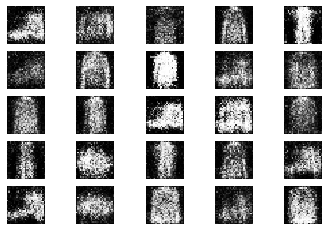

1051 [D loss: 0.602018, acc.: 67.19%] [G loss: 0.896390]
1052 [D loss: 0.550694, acc.: 75.00%] [G loss: 0.910378]
1053 [D loss: 0.707215, acc.: 54.69%] [G loss: 0.915405]
1054 [D loss: 0.628671, acc.: 65.62%] [G loss: 0.889473]
1055 [D loss: 0.626183, acc.: 62.50%] [G loss: 0.913180]
1056 [D loss: 0.638854, acc.: 62.50%] [G loss: 0.891680]
1057 [D loss: 0.587812, acc.: 65.62%] [G loss: 0.984760]
1058 [D loss: 0.637989, acc.: 60.94%] [G loss: 0.969845]
1059 [D loss: 0.567043, acc.: 71.88%] [G loss: 0.934696]
1060 [D loss: 0.552983, acc.: 73.44%] [G loss: 1.020496]
1061 [D loss: 0.538310, acc.: 76.56%] [G loss: 0.999960]
1062 [D loss: 0.555136, acc.: 71.88%] [G loss: 1.036291]
1063 [D loss: 0.612429, acc.: 71.88%] [G loss: 0.949695]
1064 [D loss: 0.608026, acc.: 67.19%] [G loss: 0.958248]
1065 [D loss: 0.620523, acc.: 62.50%] [G loss: 0.864832]
1066 [D loss: 0.628190, acc.: 59.38%] [G loss: 0.859544]
1067 [D loss: 0.518472, acc.: 76.56%] [G loss: 0.869010]
1068 [D loss: 0.582817, acc.: 7

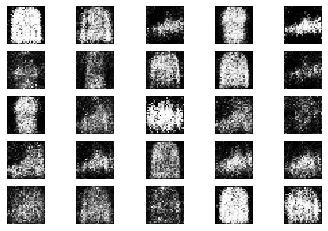

1101 [D loss: 0.657265, acc.: 59.38%] [G loss: 0.949123]
1102 [D loss: 0.646049, acc.: 67.19%] [G loss: 0.925823]
1103 [D loss: 0.602160, acc.: 67.19%] [G loss: 0.906266]
1104 [D loss: 0.579679, acc.: 70.31%] [G loss: 0.921701]
1105 [D loss: 0.616627, acc.: 65.62%] [G loss: 0.876910]
1106 [D loss: 0.517249, acc.: 71.88%] [G loss: 1.008067]
1107 [D loss: 0.605709, acc.: 76.56%] [G loss: 1.054355]
1108 [D loss: 0.583154, acc.: 70.31%] [G loss: 0.931211]
1109 [D loss: 0.609913, acc.: 67.19%] [G loss: 1.030982]
1110 [D loss: 0.613751, acc.: 67.19%] [G loss: 1.003033]
1111 [D loss: 0.561427, acc.: 68.75%] [G loss: 0.989262]
1112 [D loss: 0.576589, acc.: 71.88%] [G loss: 0.991460]
1113 [D loss: 0.555053, acc.: 65.62%] [G loss: 1.054483]
1114 [D loss: 0.539133, acc.: 76.56%] [G loss: 1.034082]
1115 [D loss: 0.594283, acc.: 68.75%] [G loss: 0.990994]
1116 [D loss: 0.636446, acc.: 64.06%] [G loss: 0.921664]
1117 [D loss: 0.582564, acc.: 70.31%] [G loss: 0.995713]
1118 [D loss: 0.595156, acc.: 6

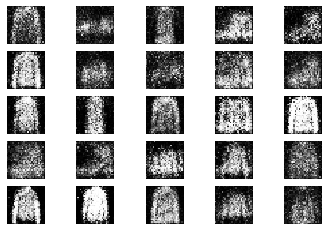

1151 [D loss: 0.553715, acc.: 71.88%] [G loss: 1.053382]
1152 [D loss: 0.598889, acc.: 68.75%] [G loss: 0.922510]
1153 [D loss: 0.707174, acc.: 48.44%] [G loss: 0.914288]
1154 [D loss: 0.599942, acc.: 68.75%] [G loss: 0.990042]
1155 [D loss: 0.545540, acc.: 78.12%] [G loss: 1.000171]
1156 [D loss: 0.603795, acc.: 68.75%] [G loss: 0.926757]
1157 [D loss: 0.558027, acc.: 78.12%] [G loss: 0.828154]
1158 [D loss: 0.659029, acc.: 54.69%] [G loss: 0.956774]
1159 [D loss: 0.632788, acc.: 60.94%] [G loss: 1.011213]
1160 [D loss: 0.623902, acc.: 62.50%] [G loss: 1.078288]
1161 [D loss: 0.652678, acc.: 65.62%] [G loss: 1.064412]
1162 [D loss: 0.578445, acc.: 71.88%] [G loss: 1.009734]
1163 [D loss: 0.574329, acc.: 70.31%] [G loss: 0.982185]
1164 [D loss: 0.598155, acc.: 67.19%] [G loss: 1.022119]
1165 [D loss: 0.618041, acc.: 65.62%] [G loss: 1.021881]
1166 [D loss: 0.669895, acc.: 59.38%] [G loss: 1.113238]
1167 [D loss: 0.655866, acc.: 54.69%] [G loss: 1.016834]
1168 [D loss: 0.649059, acc.: 5

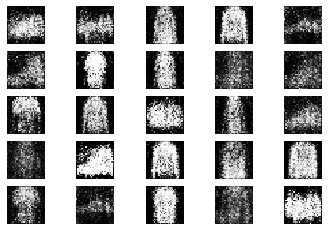

1201 [D loss: 0.602117, acc.: 64.06%] [G loss: 0.937563]
1202 [D loss: 0.649954, acc.: 57.81%] [G loss: 0.978599]
1203 [D loss: 0.608206, acc.: 64.06%] [G loss: 0.943148]
1204 [D loss: 0.602711, acc.: 71.88%] [G loss: 0.872653]
1205 [D loss: 0.566454, acc.: 68.75%] [G loss: 0.930769]
1206 [D loss: 0.598065, acc.: 68.75%] [G loss: 1.020047]
1207 [D loss: 0.601936, acc.: 70.31%] [G loss: 0.969335]
1208 [D loss: 0.583812, acc.: 73.44%] [G loss: 0.973333]
1209 [D loss: 0.633237, acc.: 67.19%] [G loss: 0.903581]
1210 [D loss: 0.572177, acc.: 75.00%] [G loss: 1.088278]
1211 [D loss: 0.609711, acc.: 65.62%] [G loss: 0.924348]
1212 [D loss: 0.616694, acc.: 68.75%] [G loss: 0.918536]
1213 [D loss: 0.640154, acc.: 60.94%] [G loss: 0.943491]
1214 [D loss: 0.596401, acc.: 67.19%] [G loss: 1.011918]
1215 [D loss: 0.647515, acc.: 59.38%] [G loss: 0.993547]
1216 [D loss: 0.581138, acc.: 70.31%] [G loss: 0.924470]
1217 [D loss: 0.557260, acc.: 67.19%] [G loss: 1.054199]
1218 [D loss: 0.628109, acc.: 6

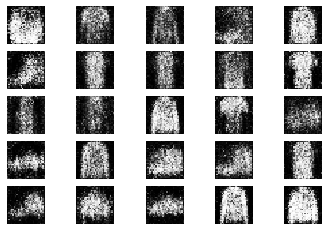

1251 [D loss: 0.625224, acc.: 64.06%] [G loss: 0.959358]
1252 [D loss: 0.674655, acc.: 65.62%] [G loss: 0.919875]
1253 [D loss: 0.611070, acc.: 75.00%] [G loss: 0.942875]
1254 [D loss: 0.572631, acc.: 76.56%] [G loss: 1.001401]
1255 [D loss: 0.551360, acc.: 71.88%] [G loss: 0.909762]
1256 [D loss: 0.608997, acc.: 56.25%] [G loss: 0.962161]
1257 [D loss: 0.604370, acc.: 68.75%] [G loss: 0.927468]
1258 [D loss: 0.538396, acc.: 71.88%] [G loss: 0.956200]
1259 [D loss: 0.554768, acc.: 70.31%] [G loss: 1.017854]
1260 [D loss: 0.729060, acc.: 57.81%] [G loss: 0.919152]
1261 [D loss: 0.649377, acc.: 57.81%] [G loss: 0.881276]
1262 [D loss: 0.618502, acc.: 65.62%] [G loss: 0.919673]
1263 [D loss: 0.595142, acc.: 67.19%] [G loss: 0.885900]
1264 [D loss: 0.648433, acc.: 64.06%] [G loss: 1.062721]
1265 [D loss: 0.591377, acc.: 70.31%] [G loss: 0.975312]
1266 [D loss: 0.610530, acc.: 67.19%] [G loss: 0.936415]
1267 [D loss: 0.582639, acc.: 73.44%] [G loss: 0.953339]
1268 [D loss: 0.579627, acc.: 6

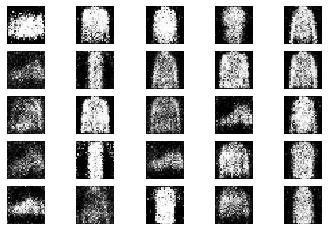

1301 [D loss: 0.551795, acc.: 75.00%] [G loss: 0.909288]
1302 [D loss: 0.550647, acc.: 75.00%] [G loss: 0.932995]
1303 [D loss: 0.604138, acc.: 68.75%] [G loss: 0.911591]
1304 [D loss: 0.602644, acc.: 71.88%] [G loss: 0.884620]
1305 [D loss: 0.682869, acc.: 56.25%] [G loss: 0.873250]
1306 [D loss: 0.627103, acc.: 59.38%] [G loss: 0.886943]
1307 [D loss: 0.601432, acc.: 65.62%] [G loss: 0.886140]
1308 [D loss: 0.587273, acc.: 75.00%] [G loss: 0.967139]
1309 [D loss: 0.590870, acc.: 73.44%] [G loss: 0.937776]
1310 [D loss: 0.655438, acc.: 57.81%] [G loss: 0.876374]
1311 [D loss: 0.636436, acc.: 56.25%] [G loss: 0.852425]
1312 [D loss: 0.676510, acc.: 53.12%] [G loss: 0.947425]
1313 [D loss: 0.526142, acc.: 81.25%] [G loss: 0.914865]
1314 [D loss: 0.578799, acc.: 62.50%] [G loss: 0.885570]
1315 [D loss: 0.621835, acc.: 65.62%] [G loss: 1.019642]
1316 [D loss: 0.589061, acc.: 71.88%] [G loss: 0.944147]
1317 [D loss: 0.518759, acc.: 82.81%] [G loss: 0.907556]
1318 [D loss: 0.608346, acc.: 6

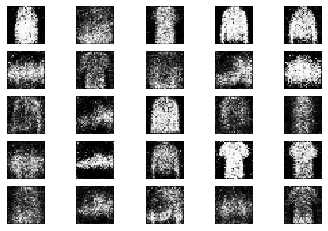

1351 [D loss: 0.594138, acc.: 67.19%] [G loss: 0.978513]
1352 [D loss: 0.594823, acc.: 67.19%] [G loss: 0.956851]
1353 [D loss: 0.564032, acc.: 76.56%] [G loss: 0.978586]
1354 [D loss: 0.588838, acc.: 70.31%] [G loss: 0.900909]
1355 [D loss: 0.603085, acc.: 75.00%] [G loss: 0.806549]
1356 [D loss: 0.560994, acc.: 75.00%] [G loss: 0.888097]
1357 [D loss: 0.581999, acc.: 70.31%] [G loss: 0.974260]
1358 [D loss: 0.527887, acc.: 79.69%] [G loss: 1.061105]
1359 [D loss: 0.643983, acc.: 64.06%] [G loss: 1.106999]
1360 [D loss: 0.531455, acc.: 75.00%] [G loss: 0.901288]
1361 [D loss: 0.552642, acc.: 76.56%] [G loss: 0.901812]
1362 [D loss: 0.540033, acc.: 75.00%] [G loss: 0.970456]
1363 [D loss: 0.599956, acc.: 70.31%] [G loss: 0.964271]
1364 [D loss: 0.571864, acc.: 76.56%] [G loss: 0.945183]
1365 [D loss: 0.606931, acc.: 65.62%] [G loss: 0.915899]
1366 [D loss: 0.605196, acc.: 64.06%] [G loss: 0.934316]
1367 [D loss: 0.600521, acc.: 73.44%] [G loss: 0.992359]
1368 [D loss: 0.675261, acc.: 6

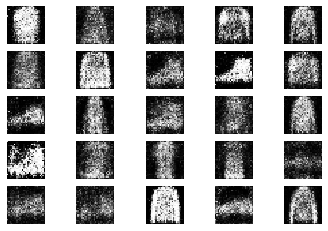

1401 [D loss: 0.533593, acc.: 79.69%] [G loss: 0.925327]
1402 [D loss: 0.583602, acc.: 73.44%] [G loss: 0.855986]
1403 [D loss: 0.642242, acc.: 65.62%] [G loss: 0.900767]
1404 [D loss: 0.549261, acc.: 71.88%] [G loss: 0.885121]
1405 [D loss: 0.672233, acc.: 62.50%] [G loss: 0.877970]
1406 [D loss: 0.621318, acc.: 64.06%] [G loss: 0.907348]
1407 [D loss: 0.657691, acc.: 56.25%] [G loss: 1.094850]
1408 [D loss: 0.639961, acc.: 57.81%] [G loss: 0.869111]
1409 [D loss: 0.675988, acc.: 65.62%] [G loss: 0.867071]
1410 [D loss: 0.632530, acc.: 68.75%] [G loss: 0.822843]
1411 [D loss: 0.548516, acc.: 70.31%] [G loss: 0.959783]
1412 [D loss: 0.594800, acc.: 60.94%] [G loss: 0.942116]
1413 [D loss: 0.534684, acc.: 78.12%] [G loss: 0.984272]
1414 [D loss: 0.623819, acc.: 62.50%] [G loss: 0.995642]
1415 [D loss: 0.663376, acc.: 67.19%] [G loss: 0.956320]
1416 [D loss: 0.635153, acc.: 60.94%] [G loss: 1.043342]
1417 [D loss: 0.662340, acc.: 70.31%] [G loss: 1.048559]
1418 [D loss: 0.547822, acc.: 7

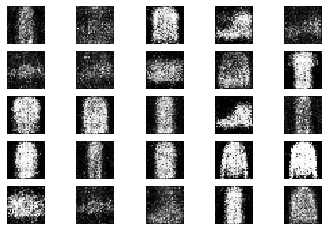

1451 [D loss: 0.634485, acc.: 65.62%] [G loss: 0.890171]
1452 [D loss: 0.600918, acc.: 67.19%] [G loss: 1.030634]
1453 [D loss: 0.569857, acc.: 70.31%] [G loss: 0.994874]
1454 [D loss: 0.608184, acc.: 59.38%] [G loss: 0.946839]
1455 [D loss: 0.597993, acc.: 70.31%] [G loss: 0.951186]
1456 [D loss: 0.595112, acc.: 75.00%] [G loss: 0.887105]
1457 [D loss: 0.620009, acc.: 64.06%] [G loss: 0.942681]
1458 [D loss: 0.631699, acc.: 56.25%] [G loss: 0.942799]
1459 [D loss: 0.637191, acc.: 60.94%] [G loss: 0.945417]
1460 [D loss: 0.608561, acc.: 68.75%] [G loss: 0.891422]
1461 [D loss: 0.613473, acc.: 65.62%] [G loss: 0.885661]
1462 [D loss: 0.576893, acc.: 67.19%] [G loss: 0.957422]
1463 [D loss: 0.635824, acc.: 65.62%] [G loss: 0.879078]
1464 [D loss: 0.637527, acc.: 59.38%] [G loss: 0.890259]
1465 [D loss: 0.576454, acc.: 73.44%] [G loss: 0.833161]
1466 [D loss: 0.647696, acc.: 64.06%] [G loss: 0.961912]
1467 [D loss: 0.663877, acc.: 54.69%] [G loss: 0.913175]
1468 [D loss: 0.631828, acc.: 6

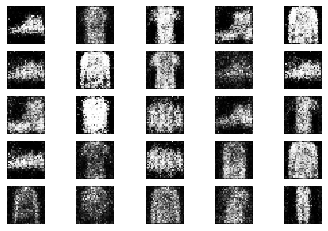

1501 [D loss: 0.617078, acc.: 65.62%] [G loss: 0.950601]
1502 [D loss: 0.631587, acc.: 60.94%] [G loss: 0.928775]
1503 [D loss: 0.600710, acc.: 71.88%] [G loss: 0.991962]
1504 [D loss: 0.537408, acc.: 75.00%] [G loss: 1.007619]
1505 [D loss: 0.574430, acc.: 73.44%] [G loss: 0.980276]
1506 [D loss: 0.639215, acc.: 65.62%] [G loss: 0.976292]
1507 [D loss: 0.607573, acc.: 67.19%] [G loss: 0.912097]
1508 [D loss: 0.696438, acc.: 62.50%] [G loss: 0.818150]
1509 [D loss: 0.624447, acc.: 64.06%] [G loss: 0.972293]
1510 [D loss: 0.631869, acc.: 65.62%] [G loss: 0.925607]
1511 [D loss: 0.570955, acc.: 70.31%] [G loss: 0.948459]
1512 [D loss: 0.598750, acc.: 70.31%] [G loss: 0.953934]
1513 [D loss: 0.577994, acc.: 68.75%] [G loss: 0.884412]
1514 [D loss: 0.665801, acc.: 59.38%] [G loss: 0.922921]
1515 [D loss: 0.678427, acc.: 59.38%] [G loss: 0.900393]
1516 [D loss: 0.625381, acc.: 62.50%] [G loss: 1.022705]
1517 [D loss: 0.599119, acc.: 65.62%] [G loss: 1.052192]
1518 [D loss: 0.669937, acc.: 5

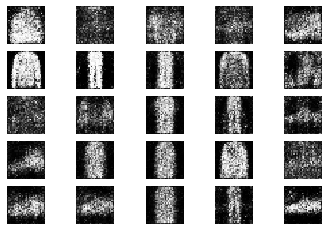

1551 [D loss: 0.551821, acc.: 76.56%] [G loss: 0.933253]
1552 [D loss: 0.575001, acc.: 70.31%] [G loss: 0.971806]
1553 [D loss: 0.573550, acc.: 73.44%] [G loss: 0.930739]
1554 [D loss: 0.616527, acc.: 71.88%] [G loss: 0.886962]
1555 [D loss: 0.515055, acc.: 73.44%] [G loss: 0.989072]
1556 [D loss: 0.581523, acc.: 75.00%] [G loss: 0.871941]
1557 [D loss: 0.544667, acc.: 71.88%] [G loss: 0.945644]
1558 [D loss: 0.650999, acc.: 60.94%] [G loss: 1.003120]
1559 [D loss: 0.664444, acc.: 59.38%] [G loss: 0.974382]
1560 [D loss: 0.674056, acc.: 53.12%] [G loss: 0.958081]
1561 [D loss: 0.609709, acc.: 65.62%] [G loss: 0.920655]
1562 [D loss: 0.612230, acc.: 60.94%] [G loss: 0.885050]
1563 [D loss: 0.577253, acc.: 68.75%] [G loss: 0.940401]
1564 [D loss: 0.578459, acc.: 68.75%] [G loss: 0.913648]
1565 [D loss: 0.582152, acc.: 73.44%] [G loss: 0.976444]
1566 [D loss: 0.580753, acc.: 70.31%] [G loss: 0.876224]
1567 [D loss: 0.662401, acc.: 60.94%] [G loss: 0.930639]
1568 [D loss: 0.621835, acc.: 6

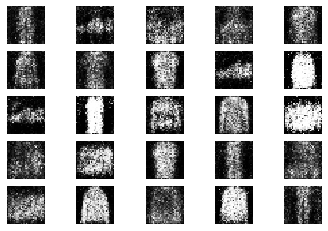

1601 [D loss: 0.579494, acc.: 73.44%] [G loss: 0.998464]
1602 [D loss: 0.624810, acc.: 62.50%] [G loss: 1.012666]
1603 [D loss: 0.657624, acc.: 64.06%] [G loss: 1.067444]
1604 [D loss: 0.599328, acc.: 71.88%] [G loss: 1.090800]
1605 [D loss: 0.563157, acc.: 73.44%] [G loss: 0.951087]
1606 [D loss: 0.563208, acc.: 71.88%] [G loss: 0.895521]
1607 [D loss: 0.639529, acc.: 65.62%] [G loss: 1.036946]
1608 [D loss: 0.553100, acc.: 71.88%] [G loss: 0.911530]
1609 [D loss: 0.602929, acc.: 68.75%] [G loss: 0.891904]
1610 [D loss: 0.591932, acc.: 67.19%] [G loss: 0.981748]
1611 [D loss: 0.594037, acc.: 67.19%] [G loss: 1.006265]
1612 [D loss: 0.587472, acc.: 68.75%] [G loss: 0.918935]
1613 [D loss: 0.575947, acc.: 68.75%] [G loss: 0.840740]
1614 [D loss: 0.610706, acc.: 65.62%] [G loss: 0.941178]
1615 [D loss: 0.580884, acc.: 70.31%] [G loss: 0.943971]
1616 [D loss: 0.633834, acc.: 60.94%] [G loss: 0.935121]
1617 [D loss: 0.533565, acc.: 78.12%] [G loss: 0.881831]
1618 [D loss: 0.615126, acc.: 7

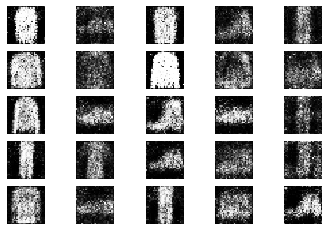

1651 [D loss: 0.571212, acc.: 68.75%] [G loss: 1.050859]
1652 [D loss: 0.608638, acc.: 70.31%] [G loss: 0.854030]
1653 [D loss: 0.539581, acc.: 71.88%] [G loss: 1.076192]
1654 [D loss: 0.592064, acc.: 67.19%] [G loss: 0.954126]
1655 [D loss: 0.620272, acc.: 64.06%] [G loss: 1.100096]
1656 [D loss: 0.583813, acc.: 65.62%] [G loss: 0.895832]
1657 [D loss: 0.597648, acc.: 71.88%] [G loss: 0.881355]
1658 [D loss: 0.584342, acc.: 59.38%] [G loss: 0.825793]
1659 [D loss: 0.612641, acc.: 62.50%] [G loss: 0.962772]
1660 [D loss: 0.626401, acc.: 64.06%] [G loss: 0.847660]
1661 [D loss: 0.616260, acc.: 67.19%] [G loss: 0.917315]
1662 [D loss: 0.634157, acc.: 70.31%] [G loss: 0.934163]
1663 [D loss: 0.534634, acc.: 78.12%] [G loss: 0.964149]
1664 [D loss: 0.597938, acc.: 60.94%] [G loss: 0.920531]
1665 [D loss: 0.598314, acc.: 68.75%] [G loss: 1.042711]
1666 [D loss: 0.558246, acc.: 71.88%] [G loss: 0.996494]
1667 [D loss: 0.566534, acc.: 68.75%] [G loss: 1.003400]
1668 [D loss: 0.641295, acc.: 6

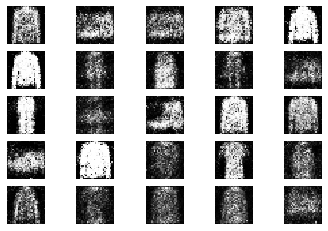

1701 [D loss: 0.652780, acc.: 59.38%] [G loss: 0.952202]
1702 [D loss: 0.607611, acc.: 65.62%] [G loss: 0.991272]
1703 [D loss: 0.600277, acc.: 68.75%] [G loss: 0.964468]
1704 [D loss: 0.612689, acc.: 67.19%] [G loss: 0.883797]
1705 [D loss: 0.583679, acc.: 68.75%] [G loss: 0.993067]
1706 [D loss: 0.568538, acc.: 68.75%] [G loss: 0.914314]
1707 [D loss: 0.569022, acc.: 75.00%] [G loss: 0.942684]
1708 [D loss: 0.594393, acc.: 68.75%] [G loss: 0.923113]
1709 [D loss: 0.548993, acc.: 75.00%] [G loss: 0.883706]
1710 [D loss: 0.626302, acc.: 59.38%] [G loss: 0.914822]
1711 [D loss: 0.628648, acc.: 64.06%] [G loss: 0.923594]
1712 [D loss: 0.567398, acc.: 67.19%] [G loss: 0.827742]
1713 [D loss: 0.616251, acc.: 67.19%] [G loss: 0.926556]
1714 [D loss: 0.560191, acc.: 75.00%] [G loss: 0.856710]
1715 [D loss: 0.663682, acc.: 62.50%] [G loss: 0.980643]
1716 [D loss: 0.680206, acc.: 64.06%] [G loss: 1.013938]
1717 [D loss: 0.584708, acc.: 65.62%] [G loss: 0.874124]
1718 [D loss: 0.569912, acc.: 6

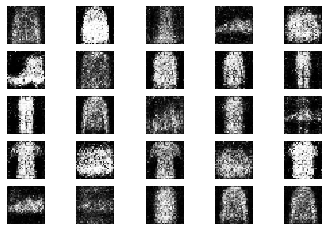

1751 [D loss: 0.611583, acc.: 67.19%] [G loss: 0.969876]
1752 [D loss: 0.600487, acc.: 62.50%] [G loss: 0.877996]
1753 [D loss: 0.579550, acc.: 71.88%] [G loss: 0.883323]
1754 [D loss: 0.699673, acc.: 53.12%] [G loss: 0.885108]
1755 [D loss: 0.536235, acc.: 78.12%] [G loss: 0.983962]
1756 [D loss: 0.598234, acc.: 70.31%] [G loss: 1.005542]
1757 [D loss: 0.594506, acc.: 60.94%] [G loss: 1.032690]
1758 [D loss: 0.553055, acc.: 73.44%] [G loss: 1.045018]
1759 [D loss: 0.575200, acc.: 71.88%] [G loss: 0.926726]
1760 [D loss: 0.608402, acc.: 65.62%] [G loss: 1.102211]
1761 [D loss: 0.570866, acc.: 67.19%] [G loss: 0.967304]
1762 [D loss: 0.532738, acc.: 76.56%] [G loss: 1.018500]
1763 [D loss: 0.645680, acc.: 62.50%] [G loss: 1.064183]
1764 [D loss: 0.580070, acc.: 78.12%] [G loss: 1.043350]
1765 [D loss: 0.610510, acc.: 59.38%] [G loss: 1.000166]
1766 [D loss: 0.549085, acc.: 73.44%] [G loss: 0.873547]
1767 [D loss: 0.622972, acc.: 68.75%] [G loss: 0.907473]
1768 [D loss: 0.568560, acc.: 7

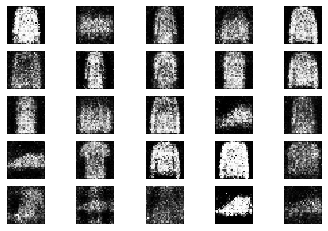

1801 [D loss: 0.517281, acc.: 84.38%] [G loss: 0.918152]
1802 [D loss: 0.551865, acc.: 68.75%] [G loss: 0.915708]
1803 [D loss: 0.473367, acc.: 81.25%] [G loss: 1.028723]
1804 [D loss: 0.503434, acc.: 82.81%] [G loss: 0.943234]
1805 [D loss: 0.570566, acc.: 75.00%] [G loss: 1.045224]
1806 [D loss: 0.620724, acc.: 59.38%] [G loss: 0.967438]
1807 [D loss: 0.655492, acc.: 56.25%] [G loss: 1.138156]
1808 [D loss: 0.554509, acc.: 76.56%] [G loss: 1.023381]
1809 [D loss: 0.620924, acc.: 65.62%] [G loss: 1.004946]
1810 [D loss: 0.622549, acc.: 64.06%] [G loss: 0.982729]
1811 [D loss: 0.610147, acc.: 60.94%] [G loss: 0.894972]
1812 [D loss: 0.561984, acc.: 73.44%] [G loss: 0.926370]
1813 [D loss: 0.608329, acc.: 67.19%] [G loss: 0.925349]
1814 [D loss: 0.578932, acc.: 67.19%] [G loss: 1.018483]
1815 [D loss: 0.569809, acc.: 76.56%] [G loss: 1.090280]
1816 [D loss: 0.525882, acc.: 76.56%] [G loss: 1.024933]
1817 [D loss: 0.589530, acc.: 65.62%] [G loss: 1.006776]
1818 [D loss: 0.624433, acc.: 6

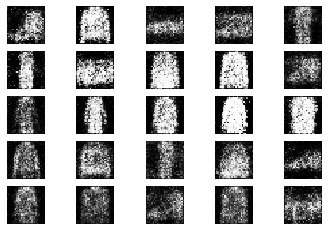

1851 [D loss: 0.564389, acc.: 65.62%] [G loss: 1.129280]
1852 [D loss: 0.552612, acc.: 68.75%] [G loss: 1.018840]
1853 [D loss: 0.655498, acc.: 62.50%] [G loss: 0.952394]
1854 [D loss: 0.629471, acc.: 57.81%] [G loss: 0.931317]
1855 [D loss: 0.626891, acc.: 67.19%] [G loss: 0.981031]
1856 [D loss: 0.592977, acc.: 71.88%] [G loss: 1.011797]
1857 [D loss: 0.625607, acc.: 65.62%] [G loss: 0.957261]
1858 [D loss: 0.577709, acc.: 70.31%] [G loss: 1.041493]
1859 [D loss: 0.572138, acc.: 73.44%] [G loss: 1.094549]
1860 [D loss: 0.557344, acc.: 76.56%] [G loss: 1.028059]
1861 [D loss: 0.597643, acc.: 62.50%] [G loss: 0.987229]
1862 [D loss: 0.627976, acc.: 64.06%] [G loss: 0.943059]
1863 [D loss: 0.628204, acc.: 59.38%] [G loss: 1.013475]
1864 [D loss: 0.615884, acc.: 62.50%] [G loss: 1.023097]
1865 [D loss: 0.561548, acc.: 73.44%] [G loss: 0.986907]
1866 [D loss: 0.591167, acc.: 70.31%] [G loss: 1.098011]
1867 [D loss: 0.557230, acc.: 73.44%] [G loss: 1.057583]
1868 [D loss: 0.656042, acc.: 5

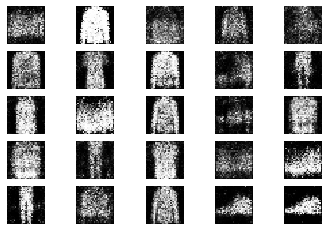

1901 [D loss: 0.549508, acc.: 75.00%] [G loss: 0.955685]
1902 [D loss: 0.612182, acc.: 67.19%] [G loss: 0.943049]
1903 [D loss: 0.600616, acc.: 70.31%] [G loss: 0.988524]
1904 [D loss: 0.720256, acc.: 51.56%] [G loss: 0.880587]
1905 [D loss: 0.648744, acc.: 67.19%] [G loss: 0.963203]
1906 [D loss: 0.546130, acc.: 70.31%] [G loss: 1.002157]
1907 [D loss: 0.564990, acc.: 65.62%] [G loss: 1.122210]
1908 [D loss: 0.582701, acc.: 68.75%] [G loss: 1.046335]
1909 [D loss: 0.661767, acc.: 64.06%] [G loss: 0.842202]
1910 [D loss: 0.662807, acc.: 59.38%] [G loss: 1.018934]
1911 [D loss: 0.578804, acc.: 75.00%] [G loss: 1.093785]
1912 [D loss: 0.570055, acc.: 81.25%] [G loss: 0.989205]
1913 [D loss: 0.636205, acc.: 59.38%] [G loss: 0.948444]
1914 [D loss: 0.594491, acc.: 67.19%] [G loss: 0.981951]
1915 [D loss: 0.614852, acc.: 65.62%] [G loss: 0.880624]
1916 [D loss: 0.589288, acc.: 68.75%] [G loss: 0.996588]
1917 [D loss: 0.594968, acc.: 65.62%] [G loss: 0.941984]
1918 [D loss: 0.581236, acc.: 6

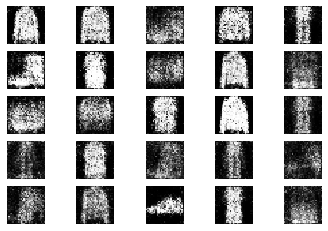

1951 [D loss: 0.603942, acc.: 64.06%] [G loss: 0.977501]
1952 [D loss: 0.631481, acc.: 59.38%] [G loss: 1.043209]
1953 [D loss: 0.623104, acc.: 64.06%] [G loss: 1.039140]
1954 [D loss: 0.599064, acc.: 70.31%] [G loss: 0.996709]
1955 [D loss: 0.586666, acc.: 73.44%] [G loss: 0.999221]
1956 [D loss: 0.612888, acc.: 75.00%] [G loss: 0.938123]
1957 [D loss: 0.592265, acc.: 71.88%] [G loss: 0.953541]
1958 [D loss: 0.613574, acc.: 59.38%] [G loss: 0.995594]
1959 [D loss: 0.605176, acc.: 59.38%] [G loss: 1.039731]
1960 [D loss: 0.610325, acc.: 68.75%] [G loss: 1.074296]
1961 [D loss: 0.630649, acc.: 60.94%] [G loss: 0.954979]
1962 [D loss: 0.535480, acc.: 71.88%] [G loss: 0.959006]
1963 [D loss: 0.533627, acc.: 73.44%] [G loss: 1.037714]
1964 [D loss: 0.592000, acc.: 67.19%] [G loss: 1.002591]
1965 [D loss: 0.585388, acc.: 68.75%] [G loss: 0.940599]
1966 [D loss: 0.578454, acc.: 68.75%] [G loss: 0.972609]
1967 [D loss: 0.645573, acc.: 67.19%] [G loss: 0.941062]
1968 [D loss: 0.573970, acc.: 6

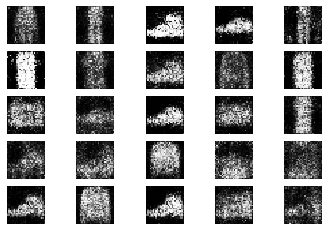

2001 [D loss: 0.573951, acc.: 73.44%] [G loss: 0.987877]
2002 [D loss: 0.586910, acc.: 67.19%] [G loss: 1.027343]
2003 [D loss: 0.614814, acc.: 57.81%] [G loss: 0.939739]
2004 [D loss: 0.612809, acc.: 62.50%] [G loss: 0.922653]
2005 [D loss: 0.700433, acc.: 51.56%] [G loss: 0.870871]
2006 [D loss: 0.606203, acc.: 76.56%] [G loss: 1.016012]
2007 [D loss: 0.629093, acc.: 57.81%] [G loss: 0.978803]
2008 [D loss: 0.667592, acc.: 62.50%] [G loss: 0.955633]
2009 [D loss: 0.563457, acc.: 70.31%] [G loss: 0.936193]
2010 [D loss: 0.605077, acc.: 65.62%] [G loss: 0.910223]
2011 [D loss: 0.604659, acc.: 64.06%] [G loss: 0.975919]
2012 [D loss: 0.546705, acc.: 71.88%] [G loss: 1.033254]
2013 [D loss: 0.537353, acc.: 78.12%] [G loss: 1.001074]
2014 [D loss: 0.586584, acc.: 65.62%] [G loss: 1.042422]
2015 [D loss: 0.589342, acc.: 68.75%] [G loss: 0.958626]
2016 [D loss: 0.552572, acc.: 67.19%] [G loss: 0.914600]
2017 [D loss: 0.586598, acc.: 70.31%] [G loss: 0.913076]
2018 [D loss: 0.602302, acc.: 6

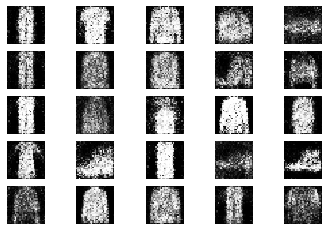

2051 [D loss: 0.644080, acc.: 67.19%] [G loss: 0.973940]
2052 [D loss: 0.551445, acc.: 79.69%] [G loss: 0.993555]
2053 [D loss: 0.546288, acc.: 79.69%] [G loss: 0.995464]
2054 [D loss: 0.648949, acc.: 67.19%] [G loss: 1.010962]
2055 [D loss: 0.543606, acc.: 75.00%] [G loss: 1.078116]
2056 [D loss: 0.629018, acc.: 68.75%] [G loss: 0.993666]
2057 [D loss: 0.595778, acc.: 67.19%] [G loss: 0.975180]
2058 [D loss: 0.610601, acc.: 73.44%] [G loss: 0.833105]
2059 [D loss: 0.587725, acc.: 65.62%] [G loss: 0.915178]
2060 [D loss: 0.640179, acc.: 59.38%] [G loss: 1.015722]
2061 [D loss: 0.559279, acc.: 73.44%] [G loss: 1.086656]
2062 [D loss: 0.637011, acc.: 62.50%] [G loss: 1.066447]
2063 [D loss: 0.593947, acc.: 73.44%] [G loss: 1.031741]
2064 [D loss: 0.583500, acc.: 70.31%] [G loss: 1.002506]
2065 [D loss: 0.687245, acc.: 59.38%] [G loss: 0.954930]
2066 [D loss: 0.540248, acc.: 68.75%] [G loss: 0.989589]
2067 [D loss: 0.630937, acc.: 60.94%] [G loss: 0.931659]
2068 [D loss: 0.636118, acc.: 6

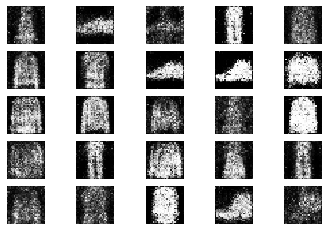

2101 [D loss: 0.577325, acc.: 79.69%] [G loss: 0.909101]
2102 [D loss: 0.649428, acc.: 59.38%] [G loss: 0.951486]
2103 [D loss: 0.636662, acc.: 62.50%] [G loss: 0.941065]
2104 [D loss: 0.594879, acc.: 67.19%] [G loss: 1.051085]
2105 [D loss: 0.638691, acc.: 62.50%] [G loss: 0.828969]
2106 [D loss: 0.630635, acc.: 60.94%] [G loss: 0.936774]
2107 [D loss: 0.703244, acc.: 53.12%] [G loss: 0.998208]
2108 [D loss: 0.579478, acc.: 75.00%] [G loss: 0.963394]
2109 [D loss: 0.623732, acc.: 60.94%] [G loss: 0.978184]
2110 [D loss: 0.620425, acc.: 68.75%] [G loss: 0.944888]
2111 [D loss: 0.515559, acc.: 76.56%] [G loss: 0.894447]
2112 [D loss: 0.597563, acc.: 64.06%] [G loss: 0.900118]
2113 [D loss: 0.598222, acc.: 71.88%] [G loss: 0.960746]
2114 [D loss: 0.580948, acc.: 65.62%] [G loss: 0.976598]
2115 [D loss: 0.615341, acc.: 71.88%] [G loss: 1.020947]
2116 [D loss: 0.561071, acc.: 70.31%] [G loss: 0.957401]
2117 [D loss: 0.639006, acc.: 60.94%] [G loss: 1.089159]
2118 [D loss: 0.584338, acc.: 7

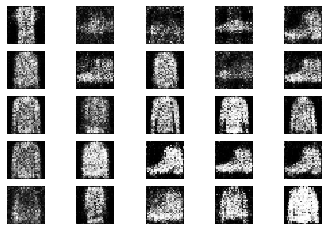

2151 [D loss: 0.579475, acc.: 65.62%] [G loss: 1.031850]
2152 [D loss: 0.628745, acc.: 60.94%] [G loss: 1.080879]
2153 [D loss: 0.619985, acc.: 65.62%] [G loss: 0.947061]
2154 [D loss: 0.544468, acc.: 75.00%] [G loss: 1.018147]
2155 [D loss: 0.637250, acc.: 59.38%] [G loss: 0.989304]
2156 [D loss: 0.664348, acc.: 60.94%] [G loss: 1.049779]
2157 [D loss: 0.594724, acc.: 67.19%] [G loss: 0.940490]
2158 [D loss: 0.573425, acc.: 68.75%] [G loss: 1.033039]
2159 [D loss: 0.598997, acc.: 73.44%] [G loss: 0.953787]
2160 [D loss: 0.607169, acc.: 62.50%] [G loss: 0.965137]
2161 [D loss: 0.581898, acc.: 79.69%] [G loss: 1.021807]
2162 [D loss: 0.634506, acc.: 60.94%] [G loss: 1.090313]
2163 [D loss: 0.505545, acc.: 73.44%] [G loss: 0.976007]
2164 [D loss: 0.559307, acc.: 68.75%] [G loss: 1.031890]
2165 [D loss: 0.695966, acc.: 59.38%] [G loss: 0.974921]
2166 [D loss: 0.597418, acc.: 67.19%] [G loss: 0.949647]
2167 [D loss: 0.607836, acc.: 65.62%] [G loss: 0.934219]
2168 [D loss: 0.559853, acc.: 6

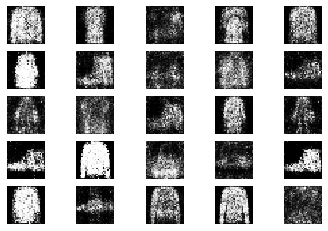

2201 [D loss: 0.597554, acc.: 70.31%] [G loss: 0.925855]
2202 [D loss: 0.616424, acc.: 65.62%] [G loss: 0.999831]
2203 [D loss: 0.540649, acc.: 73.44%] [G loss: 0.997262]
2204 [D loss: 0.607435, acc.: 64.06%] [G loss: 1.083978]
2205 [D loss: 0.625275, acc.: 57.81%] [G loss: 0.954825]
2206 [D loss: 0.556908, acc.: 79.69%] [G loss: 0.984758]
2207 [D loss: 0.622985, acc.: 62.50%] [G loss: 0.895165]
2208 [D loss: 0.631475, acc.: 59.38%] [G loss: 1.010400]
2209 [D loss: 0.691025, acc.: 60.94%] [G loss: 0.957615]
2210 [D loss: 0.599419, acc.: 65.62%] [G loss: 0.928902]
2211 [D loss: 0.597348, acc.: 67.19%] [G loss: 0.856064]
2212 [D loss: 0.599082, acc.: 71.88%] [G loss: 0.988884]
2213 [D loss: 0.589201, acc.: 73.44%] [G loss: 0.960358]
2214 [D loss: 0.526598, acc.: 73.44%] [G loss: 0.915768]
2215 [D loss: 0.637514, acc.: 64.06%] [G loss: 0.981911]
2216 [D loss: 0.568478, acc.: 76.56%] [G loss: 1.002320]
2217 [D loss: 0.656856, acc.: 67.19%] [G loss: 0.912821]
2218 [D loss: 0.628517, acc.: 6

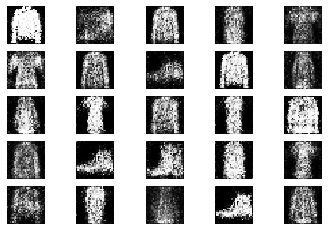

2251 [D loss: 0.566609, acc.: 78.12%] [G loss: 0.833230]
2252 [D loss: 0.624503, acc.: 65.62%] [G loss: 0.934123]
2253 [D loss: 0.644601, acc.: 60.94%] [G loss: 0.953920]
2254 [D loss: 0.559737, acc.: 73.44%] [G loss: 0.908651]
2255 [D loss: 0.680533, acc.: 60.94%] [G loss: 0.927920]
2256 [D loss: 0.615035, acc.: 68.75%] [G loss: 1.019365]
2257 [D loss: 0.581374, acc.: 68.75%] [G loss: 0.927159]
2258 [D loss: 0.668049, acc.: 67.19%] [G loss: 0.933550]
2259 [D loss: 0.616240, acc.: 62.50%] [G loss: 0.858587]
2260 [D loss: 0.602066, acc.: 65.62%] [G loss: 0.917637]
2261 [D loss: 0.541855, acc.: 79.69%] [G loss: 0.993004]
2262 [D loss: 0.628594, acc.: 59.38%] [G loss: 0.944072]
2263 [D loss: 0.642170, acc.: 59.38%] [G loss: 0.995718]
2264 [D loss: 0.661385, acc.: 48.44%] [G loss: 1.049421]
2265 [D loss: 0.651127, acc.: 62.50%] [G loss: 1.080113]
2266 [D loss: 0.585894, acc.: 71.88%] [G loss: 1.107257]
2267 [D loss: 0.580186, acc.: 75.00%] [G loss: 1.029503]
2268 [D loss: 0.582668, acc.: 6

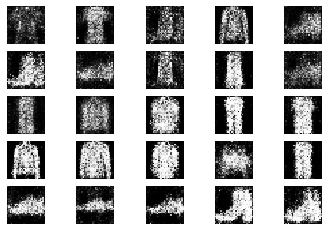

2301 [D loss: 0.619580, acc.: 68.75%] [G loss: 1.003337]
2302 [D loss: 0.613124, acc.: 67.19%] [G loss: 1.043902]
2303 [D loss: 0.537930, acc.: 75.00%] [G loss: 1.007508]
2304 [D loss: 0.564469, acc.: 71.88%] [G loss: 0.978285]
2305 [D loss: 0.652719, acc.: 54.69%] [G loss: 1.018999]
2306 [D loss: 0.603840, acc.: 70.31%] [G loss: 1.029819]
2307 [D loss: 0.552250, acc.: 70.31%] [G loss: 1.036258]
2308 [D loss: 0.648152, acc.: 67.19%] [G loss: 1.095464]
2309 [D loss: 0.609653, acc.: 56.25%] [G loss: 1.029804]
2310 [D loss: 0.619623, acc.: 57.81%] [G loss: 1.038972]
2311 [D loss: 0.667927, acc.: 65.62%] [G loss: 0.974429]
2312 [D loss: 0.612824, acc.: 62.50%] [G loss: 1.060718]
2313 [D loss: 0.530535, acc.: 71.88%] [G loss: 0.945504]
2314 [D loss: 0.635666, acc.: 54.69%] [G loss: 1.022798]
2315 [D loss: 0.650246, acc.: 60.94%] [G loss: 0.978905]
2316 [D loss: 0.555575, acc.: 71.88%] [G loss: 0.979998]
2317 [D loss: 0.626141, acc.: 64.06%] [G loss: 0.975044]
2318 [D loss: 0.595187, acc.: 7

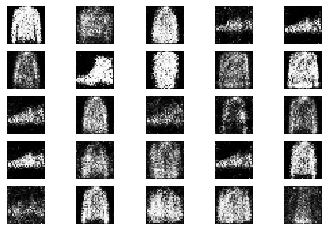

2351 [D loss: 0.622133, acc.: 67.19%] [G loss: 1.006792]
2352 [D loss: 0.592719, acc.: 68.75%] [G loss: 0.941072]
2353 [D loss: 0.588330, acc.: 67.19%] [G loss: 1.015325]
2354 [D loss: 0.665089, acc.: 59.38%] [G loss: 0.872888]
2355 [D loss: 0.527289, acc.: 81.25%] [G loss: 1.036220]
2356 [D loss: 0.590958, acc.: 70.31%] [G loss: 0.973038]
2357 [D loss: 0.659843, acc.: 65.62%] [G loss: 0.894442]
2358 [D loss: 0.635811, acc.: 54.69%] [G loss: 0.909123]
2359 [D loss: 0.584296, acc.: 68.75%] [G loss: 0.859117]
2360 [D loss: 0.622651, acc.: 60.94%] [G loss: 1.026787]
2361 [D loss: 0.552210, acc.: 70.31%] [G loss: 1.025965]
2362 [D loss: 0.674727, acc.: 56.25%] [G loss: 1.003300]
2363 [D loss: 0.601593, acc.: 71.88%] [G loss: 0.993130]
2364 [D loss: 0.658157, acc.: 64.06%] [G loss: 0.942464]
2365 [D loss: 0.688388, acc.: 56.25%] [G loss: 0.929117]
2366 [D loss: 0.598019, acc.: 71.88%] [G loss: 0.935206]
2367 [D loss: 0.588849, acc.: 62.50%] [G loss: 1.025481]
2368 [D loss: 0.529115, acc.: 8

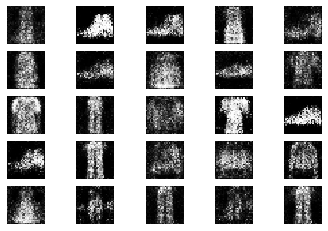

2401 [D loss: 0.552379, acc.: 76.56%] [G loss: 0.878419]
2402 [D loss: 0.612777, acc.: 67.19%] [G loss: 0.946733]
2403 [D loss: 0.586719, acc.: 70.31%] [G loss: 1.002786]
2404 [D loss: 0.590437, acc.: 68.75%] [G loss: 0.925947]
2405 [D loss: 0.635613, acc.: 62.50%] [G loss: 0.860228]
2406 [D loss: 0.635214, acc.: 64.06%] [G loss: 0.861947]
2407 [D loss: 0.603014, acc.: 68.75%] [G loss: 0.783147]
2408 [D loss: 0.627131, acc.: 65.62%] [G loss: 0.956955]
2409 [D loss: 0.585336, acc.: 76.56%] [G loss: 0.963910]
2410 [D loss: 0.662019, acc.: 59.38%] [G loss: 0.985003]
2411 [D loss: 0.664893, acc.: 62.50%] [G loss: 0.865246]
2412 [D loss: 0.595530, acc.: 67.19%] [G loss: 0.958749]
2413 [D loss: 0.623634, acc.: 68.75%] [G loss: 0.941145]
2414 [D loss: 0.646316, acc.: 59.38%] [G loss: 0.880707]
2415 [D loss: 0.634426, acc.: 68.75%] [G loss: 0.933522]
2416 [D loss: 0.580425, acc.: 71.88%] [G loss: 1.012795]
2417 [D loss: 0.613286, acc.: 73.44%] [G loss: 1.041474]
2418 [D loss: 0.591056, acc.: 6

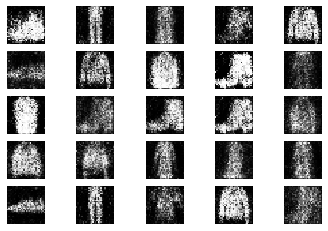

2451 [D loss: 0.645042, acc.: 65.62%] [G loss: 1.041155]
2452 [D loss: 0.544854, acc.: 73.44%] [G loss: 0.920743]
2453 [D loss: 0.652570, acc.: 64.06%] [G loss: 0.954602]
2454 [D loss: 0.582712, acc.: 70.31%] [G loss: 0.954238]
2455 [D loss: 0.613458, acc.: 67.19%] [G loss: 0.925669]
2456 [D loss: 0.615172, acc.: 64.06%] [G loss: 0.939551]
2457 [D loss: 0.694481, acc.: 65.62%] [G loss: 0.799762]
2458 [D loss: 0.634503, acc.: 57.81%] [G loss: 0.921708]
2459 [D loss: 0.570146, acc.: 78.12%] [G loss: 0.971308]
2460 [D loss: 0.642592, acc.: 60.94%] [G loss: 0.933194]
2461 [D loss: 0.552537, acc.: 67.19%] [G loss: 0.953522]
2462 [D loss: 0.666574, acc.: 54.69%] [G loss: 0.980706]
2463 [D loss: 0.612850, acc.: 65.62%] [G loss: 0.956463]
2464 [D loss: 0.624700, acc.: 64.06%] [G loss: 0.957659]
2465 [D loss: 0.583661, acc.: 73.44%] [G loss: 0.987214]
2466 [D loss: 0.622213, acc.: 70.31%] [G loss: 0.902182]
2467 [D loss: 0.616283, acc.: 62.50%] [G loss: 0.932450]
2468 [D loss: 0.593963, acc.: 6

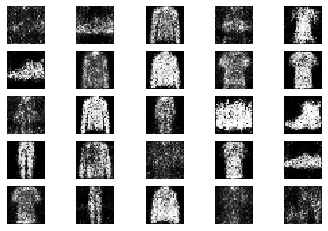

2501 [D loss: 0.533446, acc.: 70.31%] [G loss: 0.899672]
2502 [D loss: 0.635989, acc.: 64.06%] [G loss: 1.000717]
2503 [D loss: 0.603059, acc.: 59.38%] [G loss: 0.965899]
2504 [D loss: 0.576752, acc.: 59.38%] [G loss: 1.002627]
2505 [D loss: 0.677099, acc.: 53.12%] [G loss: 0.949494]
2506 [D loss: 0.693572, acc.: 62.50%] [G loss: 0.893242]
2507 [D loss: 0.682311, acc.: 51.56%] [G loss: 0.845034]
2508 [D loss: 0.554437, acc.: 75.00%] [G loss: 0.947128]
2509 [D loss: 0.704464, acc.: 56.25%] [G loss: 0.932753]
2510 [D loss: 0.620572, acc.: 70.31%] [G loss: 1.031449]
2511 [D loss: 0.661973, acc.: 64.06%] [G loss: 0.982654]
2512 [D loss: 0.651575, acc.: 65.62%] [G loss: 1.007681]
2513 [D loss: 0.635649, acc.: 60.94%] [G loss: 0.961700]
2514 [D loss: 0.600942, acc.: 67.19%] [G loss: 0.987399]
2515 [D loss: 0.693938, acc.: 57.81%] [G loss: 0.841040]
2516 [D loss: 0.625979, acc.: 68.75%] [G loss: 0.895772]
2517 [D loss: 0.594011, acc.: 67.19%] [G loss: 0.959949]
2518 [D loss: 0.607361, acc.: 6

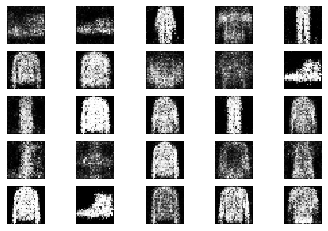

2551 [D loss: 0.650721, acc.: 65.62%] [G loss: 0.935460]
2552 [D loss: 0.564374, acc.: 78.12%] [G loss: 1.011797]
2553 [D loss: 0.612415, acc.: 68.75%] [G loss: 1.020683]
2554 [D loss: 0.662588, acc.: 59.38%] [G loss: 0.940123]
2555 [D loss: 0.537815, acc.: 79.69%] [G loss: 0.866156]
2556 [D loss: 0.634462, acc.: 65.62%] [G loss: 0.891227]
2557 [D loss: 0.736025, acc.: 51.56%] [G loss: 0.892119]
2558 [D loss: 0.654344, acc.: 62.50%] [G loss: 0.961525]
2559 [D loss: 0.654068, acc.: 60.94%] [G loss: 0.831904]
2560 [D loss: 0.635747, acc.: 64.06%] [G loss: 0.910139]
2561 [D loss: 0.673582, acc.: 60.94%] [G loss: 0.979603]
2562 [D loss: 0.615730, acc.: 68.75%] [G loss: 0.998229]
2563 [D loss: 0.635138, acc.: 65.62%] [G loss: 1.030919]
2564 [D loss: 0.637543, acc.: 65.62%] [G loss: 0.927265]
2565 [D loss: 0.596535, acc.: 65.62%] [G loss: 1.025038]
2566 [D loss: 0.623180, acc.: 59.38%] [G loss: 0.943745]
2567 [D loss: 0.664802, acc.: 60.94%] [G loss: 0.848341]
2568 [D loss: 0.573342, acc.: 6

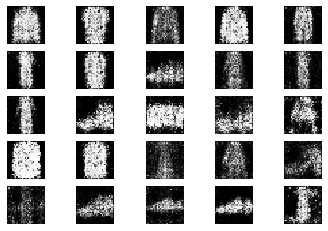

2601 [D loss: 0.636076, acc.: 71.88%] [G loss: 1.059319]
2602 [D loss: 0.628813, acc.: 59.38%] [G loss: 0.949474]
2603 [D loss: 0.607132, acc.: 68.75%] [G loss: 1.056730]
2604 [D loss: 0.641747, acc.: 60.94%] [G loss: 0.930048]
2605 [D loss: 0.542006, acc.: 76.56%] [G loss: 1.010541]
2606 [D loss: 0.586260, acc.: 70.31%] [G loss: 1.109783]
2607 [D loss: 0.589861, acc.: 68.75%] [G loss: 1.164223]
2608 [D loss: 0.657413, acc.: 54.69%] [G loss: 1.007067]
2609 [D loss: 0.680663, acc.: 67.19%] [G loss: 1.052297]
2610 [D loss: 0.592969, acc.: 64.06%] [G loss: 0.899134]
2611 [D loss: 0.612397, acc.: 67.19%] [G loss: 0.902910]
2612 [D loss: 0.602066, acc.: 62.50%] [G loss: 0.938781]
2613 [D loss: 0.589483, acc.: 65.62%] [G loss: 1.089020]
2614 [D loss: 0.560961, acc.: 71.88%] [G loss: 0.993606]
2615 [D loss: 0.686124, acc.: 51.56%] [G loss: 0.943206]
2616 [D loss: 0.616127, acc.: 68.75%] [G loss: 0.991725]
2617 [D loss: 0.660910, acc.: 64.06%] [G loss: 0.976265]
2618 [D loss: 0.617760, acc.: 6

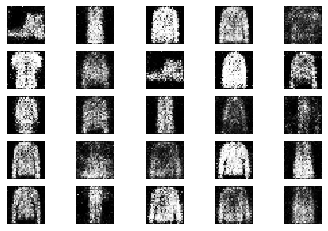

2651 [D loss: 0.610675, acc.: 67.19%] [G loss: 1.022414]
2652 [D loss: 0.586596, acc.: 70.31%] [G loss: 0.994501]
2653 [D loss: 0.600186, acc.: 67.19%] [G loss: 0.895616]
2654 [D loss: 0.669602, acc.: 59.38%] [G loss: 0.960319]
2655 [D loss: 0.657509, acc.: 57.81%] [G loss: 0.892216]
2656 [D loss: 0.620654, acc.: 71.88%] [G loss: 0.872658]
2657 [D loss: 0.575615, acc.: 71.88%] [G loss: 0.963853]
2658 [D loss: 0.704128, acc.: 67.19%] [G loss: 0.918152]
2659 [D loss: 0.629727, acc.: 60.94%] [G loss: 1.067392]
2660 [D loss: 0.588552, acc.: 68.75%] [G loss: 1.034500]
2661 [D loss: 0.532410, acc.: 71.88%] [G loss: 0.951914]
2662 [D loss: 0.595479, acc.: 65.62%] [G loss: 1.039026]
2663 [D loss: 0.616515, acc.: 68.75%] [G loss: 0.961737]
2664 [D loss: 0.605499, acc.: 65.62%] [G loss: 0.975234]
2665 [D loss: 0.553358, acc.: 70.31%] [G loss: 0.990576]
2666 [D loss: 0.652488, acc.: 57.81%] [G loss: 1.061431]
2667 [D loss: 0.617847, acc.: 62.50%] [G loss: 0.948295]
2668 [D loss: 0.665514, acc.: 5

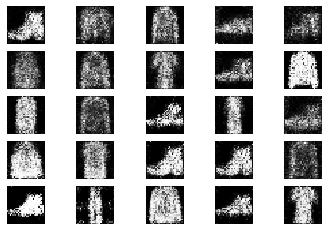

2701 [D loss: 0.584776, acc.: 62.50%] [G loss: 0.889780]
2702 [D loss: 0.690673, acc.: 56.25%] [G loss: 1.049372]
2703 [D loss: 0.632914, acc.: 60.94%] [G loss: 0.894637]
2704 [D loss: 0.603390, acc.: 59.38%] [G loss: 0.943260]
2705 [D loss: 0.574289, acc.: 70.31%] [G loss: 1.113620]
2706 [D loss: 0.544421, acc.: 71.88%] [G loss: 1.095166]
2707 [D loss: 0.616792, acc.: 60.94%] [G loss: 1.003433]
2708 [D loss: 0.645557, acc.: 54.69%] [G loss: 0.962273]
2709 [D loss: 0.650705, acc.: 54.69%] [G loss: 1.058165]
2710 [D loss: 0.583590, acc.: 65.62%] [G loss: 1.072038]
2711 [D loss: 0.668248, acc.: 60.94%] [G loss: 1.005051]
2712 [D loss: 0.617276, acc.: 70.31%] [G loss: 0.984578]
2713 [D loss: 0.587602, acc.: 71.88%] [G loss: 0.959202]
2714 [D loss: 0.620185, acc.: 62.50%] [G loss: 1.030406]
2715 [D loss: 0.564609, acc.: 71.88%] [G loss: 1.022003]
2716 [D loss: 0.582197, acc.: 65.62%] [G loss: 0.926099]
2717 [D loss: 0.605881, acc.: 65.62%] [G loss: 0.940859]
2718 [D loss: 0.609220, acc.: 6

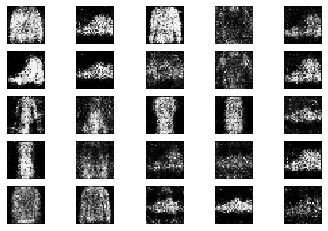

2751 [D loss: 0.585160, acc.: 65.62%] [G loss: 0.967648]
2752 [D loss: 0.664142, acc.: 50.00%] [G loss: 0.928789]
2753 [D loss: 0.604413, acc.: 60.94%] [G loss: 0.897428]
2754 [D loss: 0.614623, acc.: 62.50%] [G loss: 0.838743]
2755 [D loss: 0.539645, acc.: 73.44%] [G loss: 1.058246]
2756 [D loss: 0.648761, acc.: 62.50%] [G loss: 0.953573]
2757 [D loss: 0.640981, acc.: 64.06%] [G loss: 0.961644]
2758 [D loss: 0.627193, acc.: 70.31%] [G loss: 0.978434]
2759 [D loss: 0.540780, acc.: 68.75%] [G loss: 0.902620]
2760 [D loss: 0.581600, acc.: 64.06%] [G loss: 0.994720]
2761 [D loss: 0.626376, acc.: 60.94%] [G loss: 0.931951]
2762 [D loss: 0.627004, acc.: 65.62%] [G loss: 0.969008]
2763 [D loss: 0.593226, acc.: 70.31%] [G loss: 0.943287]
2764 [D loss: 0.599459, acc.: 67.19%] [G loss: 0.955324]
2765 [D loss: 0.634138, acc.: 56.25%] [G loss: 0.994549]
2766 [D loss: 0.651164, acc.: 60.94%] [G loss: 1.037158]
2767 [D loss: 0.635933, acc.: 53.12%] [G loss: 0.980419]
2768 [D loss: 0.645141, acc.: 5

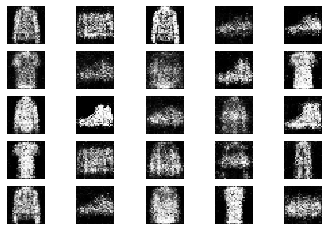

2801 [D loss: 0.651383, acc.: 64.06%] [G loss: 1.053040]
2802 [D loss: 0.566598, acc.: 75.00%] [G loss: 1.046358]
2803 [D loss: 0.574502, acc.: 68.75%] [G loss: 1.046036]
2804 [D loss: 0.686840, acc.: 56.25%] [G loss: 0.958871]
2805 [D loss: 0.619518, acc.: 68.75%] [G loss: 0.987060]
2806 [D loss: 0.625686, acc.: 68.75%] [G loss: 0.960929]
2807 [D loss: 0.594071, acc.: 62.50%] [G loss: 0.960348]
2808 [D loss: 0.711687, acc.: 57.81%] [G loss: 0.986679]
2809 [D loss: 0.702830, acc.: 50.00%] [G loss: 0.936531]
2810 [D loss: 0.662546, acc.: 59.38%] [G loss: 0.971182]
2811 [D loss: 0.625697, acc.: 60.94%] [G loss: 0.999494]
2812 [D loss: 0.601033, acc.: 65.62%] [G loss: 1.008739]
2813 [D loss: 0.595765, acc.: 70.31%] [G loss: 0.990011]
2814 [D loss: 0.609459, acc.: 71.88%] [G loss: 1.035308]
2815 [D loss: 0.677698, acc.: 59.38%] [G loss: 0.863766]
2816 [D loss: 0.632278, acc.: 64.06%] [G loss: 0.916837]
2817 [D loss: 0.623590, acc.: 64.06%] [G loss: 0.893429]
2818 [D loss: 0.561589, acc.: 7

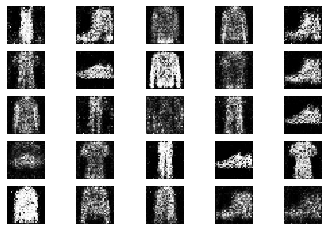

2851 [D loss: 0.649115, acc.: 67.19%] [G loss: 0.957077]
2852 [D loss: 0.568907, acc.: 73.44%] [G loss: 0.903324]
2853 [D loss: 0.637888, acc.: 57.81%] [G loss: 0.892555]
2854 [D loss: 0.541603, acc.: 76.56%] [G loss: 0.970728]
2855 [D loss: 0.654761, acc.: 62.50%] [G loss: 0.889210]
2856 [D loss: 0.643828, acc.: 54.69%] [G loss: 0.962277]
2857 [D loss: 0.583094, acc.: 68.75%] [G loss: 0.858841]
2858 [D loss: 0.548086, acc.: 73.44%] [G loss: 0.917301]
2859 [D loss: 0.673930, acc.: 54.69%] [G loss: 1.013715]
2860 [D loss: 0.682458, acc.: 56.25%] [G loss: 1.005050]
2861 [D loss: 0.642601, acc.: 57.81%] [G loss: 1.034609]
2862 [D loss: 0.590954, acc.: 64.06%] [G loss: 1.046609]
2863 [D loss: 0.645310, acc.: 57.81%] [G loss: 1.089374]
2864 [D loss: 0.627281, acc.: 68.75%] [G loss: 1.026032]
2865 [D loss: 0.637186, acc.: 54.69%] [G loss: 1.028390]
2866 [D loss: 0.620050, acc.: 71.88%] [G loss: 1.019231]
2867 [D loss: 0.592806, acc.: 70.31%] [G loss: 0.927659]
2868 [D loss: 0.625976, acc.: 6

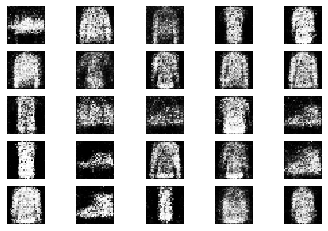

2901 [D loss: 0.613086, acc.: 65.62%] [G loss: 1.012799]
2902 [D loss: 0.647156, acc.: 62.50%] [G loss: 0.945944]
2903 [D loss: 0.596260, acc.: 71.88%] [G loss: 0.930422]
2904 [D loss: 0.687636, acc.: 53.12%] [G loss: 0.910322]
2905 [D loss: 0.588001, acc.: 64.06%] [G loss: 0.934409]
2906 [D loss: 0.625880, acc.: 64.06%] [G loss: 0.939829]
2907 [D loss: 0.630327, acc.: 57.81%] [G loss: 0.910250]
2908 [D loss: 0.566285, acc.: 67.19%] [G loss: 0.899448]
2909 [D loss: 0.651080, acc.: 59.38%] [G loss: 0.989355]
2910 [D loss: 0.632537, acc.: 59.38%] [G loss: 0.910124]
2911 [D loss: 0.675467, acc.: 60.94%] [G loss: 0.989802]
2912 [D loss: 0.572469, acc.: 76.56%] [G loss: 0.968232]
2913 [D loss: 0.625244, acc.: 62.50%] [G loss: 0.937186]
2914 [D loss: 0.597751, acc.: 73.44%] [G loss: 0.979819]
2915 [D loss: 0.606564, acc.: 64.06%] [G loss: 0.929379]
2916 [D loss: 0.657936, acc.: 64.06%] [G loss: 0.860705]
2917 [D loss: 0.648334, acc.: 60.94%] [G loss: 0.823475]
2918 [D loss: 0.600117, acc.: 6

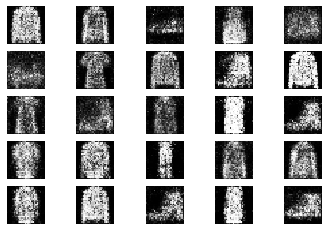

2951 [D loss: 0.539641, acc.: 75.00%] [G loss: 0.963666]
2952 [D loss: 0.662802, acc.: 62.50%] [G loss: 1.011665]
2953 [D loss: 0.627751, acc.: 60.94%] [G loss: 0.886440]
2954 [D loss: 0.590197, acc.: 67.19%] [G loss: 1.023160]
2955 [D loss: 0.631991, acc.: 62.50%] [G loss: 0.909489]
2956 [D loss: 0.610660, acc.: 73.44%] [G loss: 1.106590]
2957 [D loss: 0.622868, acc.: 68.75%] [G loss: 0.991601]
2958 [D loss: 0.540990, acc.: 73.44%] [G loss: 0.940895]
2959 [D loss: 0.558231, acc.: 78.12%] [G loss: 1.062436]
2960 [D loss: 0.666781, acc.: 60.94%] [G loss: 0.888705]
2961 [D loss: 0.580991, acc.: 68.75%] [G loss: 0.991780]
2962 [D loss: 0.583897, acc.: 73.44%] [G loss: 0.918349]
2963 [D loss: 0.535129, acc.: 78.12%] [G loss: 0.962009]
2964 [D loss: 0.610263, acc.: 65.62%] [G loss: 0.977539]
2965 [D loss: 0.549489, acc.: 71.88%] [G loss: 0.941636]
2966 [D loss: 0.616283, acc.: 65.62%] [G loss: 0.923934]
2967 [D loss: 0.616508, acc.: 68.75%] [G loss: 0.817818]
2968 [D loss: 0.572724, acc.: 6

In [23]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

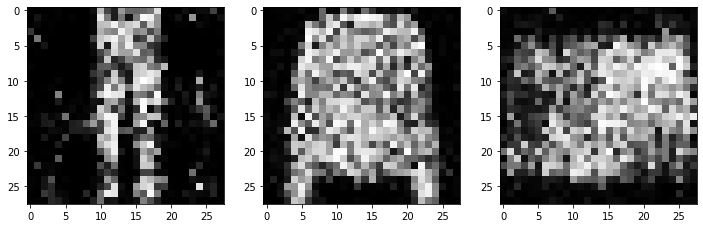

In [24]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()